In [1]:
#!/usr/bin/env python
#-*- coding: utf-8 -*-
'''
    python ==> 소프트웨어융합최신기술 part3_3, Swedish traffic sign data에서 가져온 
                                        annotations.txt와 사진데이터를 사용해서 
                                        사진에서 Traffic Sign들을 추출한 다음 
                                        Deep Learning을 사용해 무슨 표지판인지 맞춰보는 코드

    여기서 사진데이터를 다운받을 수 있다
    http://www.cvl.isy.liu.se/research/datasets/traffic-signs-dataset/

'''
import sys,os,time
import math, random
import cv2
import os
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import itertools

In [3]:
#----------------------------------------------------------------
# START OF DATA PREPROCESSING
#----------------------------------------------------------------
img_path = 'E:\\ml_dataset\\Set2Part0\\'
img_fnames = os.listdir(img_path)

annotations = open(img_path + 'annotations.txt')
save_path = './swConvTech_part3_3/cropped_img_forSW/'


img_name = []
traffic_signs = []
split_data = []
counter = 0

# annotations.txt에서 이미지와 표지판 데이터를 분리시킵니다
for line in annotations:
    split_data.append(line.split(':'))

    img_name.append(split_data[counter][0])
    traffic_signs.append(split_data[counter][1])

    counter += 1


# 표지판 데이터는 사각형좌표와 정보데이터를 분리합니다 (';', ',')로 두번 분리해야 합니다
for i in range(0, len(traffic_signs)):
    traffic_signs[i] = traffic_signs[i].split(';')
    
for i in range(0, len(traffic_signs)):
    for j in range(0, len(traffic_signs[i])):
        traffic_signs[i][j] = traffic_signs[i][j].split(',')

In [5]:
# 이미지와 4개의 좌표를 받아서 이미지를 자른 후 저장하는 함수
def img_trim(img, x1, y1, x2, y2, name1, name2, delimiter):
    # 최종적으로 Trim할 좌표를 str-->float-->int형으로 받아와야하므로 이와같이 처리합니다
    x1 = int(float(x1))
    x2 = int(float(x2))
    y1 = int(float(y1))
    y2 = int(float(y2))

    # width, height를 구합니다
    w = x1 - x2
    h = y1 - y2
    assert(w > 0)
    assert(h > 0)

    # name1에 .jpg를 전부 지웁니다
    name1 = name1.replace('.jpg','')

    img_trim = img[y2:y2+h, x2:x2+w]

    # 잘라진 사진들을 해당경로에 저장합니다 [사진이름]-[표지판이름].jpg
    cv2.imwrite(save_path + str(name1) + delimiter + str(name2) + '.jpg', img_trim)





# 루프를 돌면서 표지판 데이터를 Trim 합니다
for i in range(0, len(traffic_signs)):
    img = cv2.imread(img_path + img_name[i])
    if(len(traffic_signs[i]) >= 2):
        # 만약 표지판데이터가 있다면 그 좌표를 읽어서 크기만큼 Trim 합니다
        for j in range(0, len(traffic_signs[i])):
            if(len(traffic_signs[i][j]) > 4):

                x1 = traffic_signs[i][j][1]
                y1 = traffic_signs[i][j][2]
                x2 = traffic_signs[i][j][3]
                y2 = traffic_signs[i][j][4]

                name = traffic_signs[i][j][6]
                print('i : %d' % i ,x1,y1,x2,y2)
                
                # 좌표와 이름을 파라미터에 넣고 함수를 호출합니다. 
                # 파일이름의 구분자는 '-'입니다
                img_trim(img,x1,y1,x2,y2, img_name[i], name, '-')
    else:
        continue

#--------------------------------------------------------------------------------------
# END OF DATA PREPROCESSING
#--------------------------------------------------------------------------------------

i : 4  377.737633  470.265032  355.784819  446.711493
i : 5  398.162973  469.750756  373.926451  443.183799
i : 6  421.951760  466.808005  393.983863  437.145083
i : 7  465.033384  462.795458  431.563438  426.820959
i : 8  516.834342  457.464211  479.713516  416.027009
i : 9  639.212170  455.389548  587.084193  398.216929
i : 10  975.069146  433.391346  892.551615  335.577882
i : 44  381.136110  450.226577  365.535203  434.040636
i : 44  75.926368  457.409937  58.917487  439.692352
i : 45  375.164370  447.194537  358.813273  430.332468
i : 45  37.906998  456.862233  18.316184  438.039686
i : 46  379.670102  447.343638  358.534837  426.771979
i : 47  387.457784  450.885565  363.531339  426.234076
i : 48  400.380896  448.271276  373.792325  421.399848
i : 49  417.913707  444.351663  389.090923  414.073182
i : 50  468.652216  446.237718  430.045131  407.067026
i : 51  541.902847  440.500803  493.635844  391.896269
i : 52  795.535559  415.749255  712.029028  327.563479
i : 56  319.538549  

i : 114  340.844089  466.651847  324.695651  450.710441
i : 114  292.069686  484.567043  282.091810  475.133415
i : 114  292.173499  490.508594  283.463027  483.042475
i : 114  198.149961  486.500519  185.356227  474.255088
i : 115  344.367313  467.645458  326.052847  450.094095
i : 115  289.696457  485.297297  279.287897  476.345935
i : 115  289.344562  492.442024  280.995807  485.075476
i : 115  191.796239  487.976841  178.264220  474.774870
i : 116  349.683950  456.079038  328.126098  434.521187
i : 116  279.952563  476.067467  269.787777  466.616000
i : 116  279.407520  483.246005  271.321959  475.310176
i : 116  172.983322  479.224701  157.248947  465.146576
i : 117  362.849123  457.084929  340.320197  432.419639
i : 117  278.088962  479.600721  269.066149  470.792737
i : 117  279.866887  488.119282  270.838495  479.942626
i : 117  163.621748  485.220128  149.181669  469.748615
i : 118  388.869278  451.683736  362.737861  422.856221
i : 118  281.773528  479.845437  270.089822  467

i : 186  133.162592  461.201045  113.834197  441.684996
i : 186  343.307461  449.479638  329.001784  434.440336
i : 186  342.519286  461.008099  331.148193  448.515911
i : 187  86.125094  456.006855  55.358886  426.301551
i : 187  375.783589  441.158785  357.825843  422.722165
i : 187  376.671412  457.366477  359.838900  441.359088
i : 188  40.001322  454.186448  3.838770  413.137065
i : 188  399.982332  436.114174  381.136178  416.871259
i : 188  401.605710  454.415159  383.901164  437.574250
i : 189  440.987394  424.211443  413.081490  400.100742
i : 189  439.248155  449.647432  415.691077  426.617751
i : 190  472.844291  416.243551  442.698731  384.991731
i : 190  472.208984  442.752830  446.839464  416.360346
i : 191  562.629055  395.414414  521.767541  355.961918
i : 191  563.029238  435.159156  526.767007  399.536847
i : 192  728.938017  360.783788  669.684181  301.529953
i : 192  729.429563  418.235598  678.907079  367.109259
i : 193  1002.941486  301.869664  915.426592  208.546

i : 308  1105.603165  339.620750  982.603165  205.620750
i : 309  346.211127  461.911663  330.166985  441.792818
i : 309  345.213754  474.443493  334.349304  463.579043
i : 309  121.932101  459.198926  86.754828  424.667108
i : 310  356.034309  458.666249  337.692537  436.830806
i : 310  353.484634  472.609113  343.300424  460.970015
i : 310  96.963775  454.213951  54.563775  412.813951
i : 311  370.550695  449.227891  351.303170  424.099178
i : 311  370.430654  464.453013  357.298260  451.675548
i : 311  49.750879  437.700469  -0.249121  377.700469
i : 312  388.207469  450.309486  366.810730  422.700791
i : 312  386.729618  468.784472  371.606161  451.809163
i : 313  415.993030  440.465908  389.292300  406.298025
i : 313  413.641847  461.196186  395.747513  443.301852
i : 314  439.656905  433.050357  410.616905  395.713214
i : 314  437.193276  458.073801  416.075839  437.611167
i : 315  483.196774  425.453192  444.723323  380.394195
i : 315  480.284538  456.354775  455.647819  431.718

i : 437  491.290084  445.217885  459.636666  414.715501
i : 437  487.515245  466.643449  465.460508  445.201344
i : 438  576.326873  447.399016  540.516747  407.512940
i : 438  572.063726  470.142124  542.982215  444.853853
i : 439  699.827627  427.309827  654.782772  378.681859
i : 439  692.951587  462.911744  658.192966  427.408295
i : 440  938.715199  390.021714  876.717950  323.288564
i : 440  932.685603  444.361107  880.692584  393.064423
i : 440  260.055612  491.385208  247.342740  480.155505
i : 441  267.590363  488.804883  258.269214  476.376685
i : 442  285.652358  488.976024  270.633127  475.437562
i : 443  302.692301  488.349072  287.547059  472.963430
i : 444  424.056484  445.833416  393.583701  415.662343
i : 444  421.503675  466.844622  399.722425  444.262591
i : 445  477.595296  428.443032  435.952219  386.178416
i : 445  475.308249  457.984237  442.580500  428.273940
i : 446  680.472196  374.596246  612.048365  308.766684
i : 446  677.727249  430.494902  618.516993  376

i : 533  889.050996  382.667644  788.050996  278.667644
i : 545  883.985017  398.522401  864.473112  377.743489
i : 545  882.611419  412.836380  864.680583  397.542432
i : 545  643.630179  417.484685  625.247200  400.250642
i : 545  74.311798  402.448863  49.839104  364.981820
i : 546  868.460401  395.248404  848.682623  373.692849
i : 546  867.927631  411.930107  850.559210  394.990536
i : 546  608.203697  418.000868  590.925216  398.823653
i : 547  841.563691  401.515116  819.526191  380.758866
i : 547  844.041952  420.485935  822.508465  401.862378
i : 547  560.922975  429.083590  539.316856  407.261410
i : 548  793.581527  406.036747  767.243499  382.571958
i : 548  793.552025  426.248700  772.479298  406.385063
i : 548  474.227235  436.386681  451.579380  412.668848
i : 549  734.235637  406.882286  706.830139  379.975070
i : 549  736.039169  431.582189  710.453885  409.508610
i : 549  359.936202  444.852914  331.282024  417.077698
i : 550  687.077817  406.445724  653.689928  374.2

i : 718  541.085202  393.762643  504.296075  358.316185
i : 718  542.016694  430.037394  509.662408  399.420251
i : 719  1069.118992  252.610199  977.118992  155.610199
i : 719  1072.623095  359.168230  991.623095  273.168230
i : 722  440.517025  433.241868  419.063194  412.819471
i : 723  466.004146  432.777176  441.703447  408.719483
i : 724  489.979633  421.842477  460.274328  394.046799
i : 725  545.931419  410.686401  504.931419  371.686401
i : 726  672.415894  385.114277  613.350245  327.318857
i : 727  1114.607855  288.603165  996.607855  165.603165
i : 730  418.964315  426.942856  398.695498  407.838913
i : 730  418.416891  443.900615  402.411441  427.175820
i : 731  451.237477  417.614104  427.069437  392.103396
i : 731  451.650729  439.542903  431.691236  419.768219
i : 732  489.724673  402.546757  463.047750  375.869834
i : 732  492.953448  430.994718  468.496371  408.270820
i : 733  541.975973  383.196033  508.528737  351.577942
i : 733  543.436559  418.590628  514.819223  

i : 817  868.022860  300.620750  762.022860  200.620750
i : 818  1276.208089  168.562134  1178.208089  2.562134
i : 826  240.854629  412.305914  209.518541  380.611699
i : 827  425.879836  409.688746  388.879836  372.688746
i : 828  529.424971  411.194021  486.424971  372.194021
i : 829  592.444900  411.177608  551.444900  363.177608
i : 830  678.488277  398.198710  628.488277  352.198710
i : 831  816.021688  373.667644  752.021688  313.667644
i : 832  882.052169  365.651231  813.052169  286.651231
i : 833  1277.182298  284.107268  1164.182298  155.107268
i : 835  356.429318  482.290034  346.208498  472.239561
i : 836  344.984742  476.027270  333.492205  466.012344
i : 837  340.006954  477.530811  329.182664  465.972671
i : 838  342.970169  485.843827  331.250052  475.872981
i : 839  344.243672  468.597016  330.379131  456.007375
i : 840  453.496724  443.375186  427.010324  421.445586
i : 841  476.160950  428.369707  445.812113  402.625521
i : 842  496.511746  413.644831  462.473284  3

i : 917  504.924385  422.706331  478.924385  399.706331
i : 917  12.309348  450.793776  2.955017  431.376453
i : 917  115.945567  467.325132  104.904976  452.550224
i : 918  537.631700  426.398406  510.823190  401.887768
i : 918  107.356898  478.830878  92.807245  462.341271
i : 919  585.451934  418.706331  553.451934  388.706331
i : 919  95.542487  473.531639  80.491820  459.024972
i : 920  648.911988  403.251195  614.926308  370.411100
i : 920  86.433616  464.379023  71.458686  445.838633
i : 921  790.884087  383.118769  747.504341  338.283326
i : 921  70.854010  468.838371  53.076666  446.416496
i : 922  896.700948  349.690304  845.676154  296.964684
i : 922  58.025177  453.408565  40.272965  429.738948
i : 923  1184.665299  294.131887  1113.665299  216.131887
i : 923  24.742830  451.597636  5.205517  425.821517
i : 928  801.227221  398.856001  780.484006  377.728653
i : 929  759.944884  374.401323  737.340906  350.667145
i : 930  734.305091  371.871240  709.649027  347.636648
i : 9

i : 1036  830.528293  373.791922  745.619504  288.883132
i : 1038  428.246893  442.889922  398.214388  414.585906
i : 1039  484.030860  417.404990  444.185687  380.519744
i : 1040  645.070315  380.355161  579.583347  314.868193
i : 1043  504.269639  442.634090  494.229235  430.681228
i : 1043  324.554300  453.769100  312.963800  441.335700
i : 1044  487.620759  444.580632  475.155087  432.807498
i : 1044  291.205107  454.550554  279.137501  441.240695
i : 1045  467.517476  442.702536  453.484281  429.615399
i : 1045  244.831184  452.023841  234.335020  439.502102
i : 1046  457.840286  443.537111  440.664320  429.721660
i : 1046  213.105349  457.940689  197.811401  440.888816
i : 1047  439.779497  448.351368  425.469435  432.174776
i : 1047  165.749176  457.401322  150.194141  440.502025
i : 1048  433.377643  438.188691  414.613287  419.424335
i : 1048  117.600142  446.395210  97.935806  428.110828
i : 1049  432.070776  440.274778  410.901614  420.177472
i : 1049  71.640533  452.283485 

i : 1180  730.131980  475.624182  694.279101  439.366187
i : 1180  410.728333  442.234238  384.874675  414.429360
i : 1180  412.834582  471.553208  384.311126  443.968023
i : 1180  440.819860  443.638036  414.909207  419.222229
i : 1180  43.971797  447.943850  31.998345  429.620841
i : 1180  43.793339  473.905062  31.881852  451.164949
i : 1181  751.185409  466.462449  711.649754  429.580194
i : 1181  392.490209  427.784146  363.669605  397.546135
i : 1181  394.890777  461.749788  363.565668  429.593039
i : 1181  426.702475  432.226451  399.204376  404.728352
i : 1182  793.889736  469.000237  745.853095  421.911688
i : 1182  361.301059  424.446366  326.528331  389.673638
i : 1182  363.569640  464.292276  325.142877  425.413433
i : 1182  403.477690  434.815864  371.280720  401.073440
i : 1183  853.720008  480.382962  787.942230  422.382962
i : 1183  315.856822  433.959879  273.437903  390.883303
i : 1183  321.187021  480.247289  272.368488  434.374702
i : 1183  370.905941  448.436952  3

i : 1218  1279.202227  318.123681  1198.202227  165.123681
i : 1218  1232.688746  397.164713  1203.688746  339.164713
i : 1218  368.283117  518.174006  333.024234  483.426121
i : 1218  370.865504  565.117135  331.491903  525.546665
i : 1218  566.447565  542.828213  547.135323  524.704416
i : 1219  339.367028  507.547168  298.196815  466.696104
i : 1219  339.793566  560.236404  296.571113  515.984845
i : 1219  560.672520  539.831136  538.370322  520.232235
i : 1220  288.047250  485.327542  238.481293  434.212649
i : 1220  289.826146  552.850229  234.474261  496.803550
i : 1220  552.860622  533.331618  531.902961  513.371940
i : 1221  170.265436  445.067804  100.860896  372.289432
i : 1221  172.794347  539.802332  92.872269  460.984151
i : 1221  529.594759  522.836374  502.372178  496.736374
i : 1222  527.967482  522.078487  494.990013  490.577621
i : 1222  442.285830  571.697574  432.024189  561.633273
i : 1222  443.407100  561.977500  433.260800  551.989700
i : 1223  535.098903  506.90

i : 1267  783.037074  475.810875  723.232095  415.416684
i : 1267  813.757490  532.598407  787.907908  506.570552
i : 1267  560.688145  538.744777  533.288567  511.954079
i : 1267  473.244121  564.856162  461.460338  552.230679
i : 1267  449.971983  566.963526  441.339884  560.395625
i : 1268  896.038101  441.665299  817.038101  362.665299
i : 1268  854.927064  530.447491  828.594583  504.299153
i : 1268  576.303874  539.743945  543.007652  511.716112
i : 1268  482.414785  572.173812  467.890975  557.426560
i : 1268  458.030209  573.738624  447.985944  564.949892
i : 1269  1151.100101  368.639500  1023.100011  250.639500
i : 1269  915.117600  532.810400  883.801900  500.133100
i : 1269  604.118800  543.239000  569.518400  511.110100
i : 1269  496.586800  580.517900  482.634300  567.395800
i : 1269  470.807500  583.293800  462.028300  575.696400
i : 1270  981.581652  499.897975  948.950073  465.916124
i : 1270  633.289867  514.433651  592.883293  480.099741
i : 1270  511.639468  556.804

i : 1340  960.943662  436.495488  896.574634  373.101749
i : 1341  1278.709848  352.136577  1208.709848  220.136577
i : 1343  680.584193  533.401442  653.855497  505.691877
i : 1343  660.164016  515.554912  638.258592  486.347680
i : 1343  286.474779  544.973078  262.209892  521.745152
i : 1344  698.454724  525.921902  667.857280  493.568867
i : 1344  673.138936  505.424780  648.890348  476.151710
i : 1344  261.312653  539.196640  237.269444  513.394170
i : 1345  713.581837  515.025987  680.412508  479.569118
i : 1345  687.276731  493.013407  658.815894  459.315775
i : 1345  206.358355  535.265637  177.887766  505.383284
i : 1346  740.027806  501.998038  701.877052  462.540752
i : 1346  705.795290  476.898628  674.501172  438.075098
i : 1346  152.145211  526.847192  116.806313  493.671899
i : 1346  521.525495  556.074296  511.080571  546.432828
i : 1347  824.016999  477.689918  771.016999  422.689918
i : 1347  778.354628  442.070152  735.103954  393.336998
i : 1347  47.696405  513.7996

i : 1391  812.968392  521.589578  785.090930  493.313867
i : 1391  344.093173  538.413451  318.413714  512.377334
i : 1391  653.807683  575.679192  646.161245  568.943044
i : 1391  654.930491  586.149006  646.486994  577.330243
i : 1392  833.839910  513.621834  801.561429  480.393985
i : 1392  304.305471  536.943374  274.977670  505.493167
i : 1392  637.690669  575.547308  628.971156  566.510723
i : 1392  636.302908  583.610856  629.281169  576.404334
i : 1393  879.369251  500.396270  840.980266  462.241364
i : 1393  252.324622  528.499120  219.687806  494.004925
i : 1393  623.553263  575.490198  614.945836  567.665265
i : 1393  622.692933  583.724721  615.511347  577.095565
i : 1394  930.376948  491.518178  883.772010  443.678672
i : 1394  190.640360  525.752445  152.676000  486.834206
i : 1394  603.082330  579.699687  595.928021  571.914115
i : 1394  605.235865  588.118569  595.873075  581.058104
i : 1395  1203.647714  414.673505  1123.647714  335.673505
i : 1395  553.558786  574.200

i : 1416  582.482906  548.942044  566.380122  530.222557
i : 1416  315.888334  556.075157  301.005391  542.028334
i : 1416  390.462237  533.814203  355.731947  496.768560
i : 1416  442.677912  564.273524  424.950639  546.014433
i : 1417  681.964464  501.882188  643.461446  462.332892
i : 1417  585.728902  551.198468  567.013134  531.132078
i : 1417  302.744365  559.167166  287.491513  542.840169
i : 1417  372.671605  531.561718  332.962847  490.272512
i : 1417  437.294087  567.895802  416.862122  546.906601
i : 1418  718.833905  481.458660  671.907688  433.056776
i : 1418  587.419960  546.335688  566.705674  525.621403
i : 1418  274.424471  555.586699  258.532288  538.610958
i : 1418  333.340532  517.411836  283.930318  465.584817
i : 1418  422.349095  566.801715  398.750573  542.873144
i : 1419  801.648508  440.178933  736.601241  372.034177
i : 1419  589.025925  538.518119  566.711142  515.958119
i : 1419  249.302462  487.595625  180.787310  417.277443
i : 1419  401.836857  563.50940

i : 1446  623.584147  535.218101  594.067687  504.724274
i : 1446  289.691926  509.126922  258.935496  479.017996
i : 1446  291.918665  541.370786  257.918665  509.431392
i : 1446  328.674403  553.726461  312.053507  536.932432
i : 1446  342.238809  548.377987  330.381667  536.520844
i : 1446  344.029114  563.184300  330.318646  549.473833
i : 1447  638.883006  532.239013  604.773529  495.400778
i : 1447  245.978722  500.921806  210.688506  462.978190
i : 1447  245.642458  536.831611  207.941192  499.499966
i : 1447  309.211007  555.440138  291.722370  536.440138
i : 1447  328.510904  549.433952  315.746335  536.496889
i : 1447  328.236849  565.680410  314.725738  550.855719
i : 1448  659.866573  531.198014  620.350165  493.163472
i : 1448  215.446268  495.359775  173.857428  455.518366
i : 1448  220.002828  539.317691  173.702399  496.937863
i : 1448  302.365744  559.517866  282.785545  538.305985
i : 1448  325.071794  555.275676  311.273717  541.477599
i : 1448  326.632191  569.52579

i : 1482  445.385111  529.711020  406.718445  489.711020
i : 1482  422.323472  506.907857  391.356930  476.162504
i : 1483  344.788892  502.468693  292.319064  449.254613
i : 1483  322.031176  477.100484  280.139907  435.477749
i : 1484  277.764889  493.218128  211.560555  430.385311
i : 1484  255.662534  465.827952  207.764636  417.599724
i : 1485  119.753224  498.706331  19.753224  395.706331
i : 1485  115.257327  462.199883  50.257327  395.199883
i : 1500  631.211182  564.346449  619.913310  552.282620
i : 1500  630.952605  577.676382  618.704133  563.847462
i : 1501  584.065679  563.067292  570.966492  550.462414
i : 1501  585.035092  576.797950  571.761408  564.341108
i : 1502  555.551053  563.440958  542.387531  549.514333
i : 1502  556.326877  576.085827  543.367170  563.349563
i : 1503  504.932591  559.638484  491.256641  545.962534
i : 1503  506.396401  573.028738  490.611665  559.163768
i : 1504  442.920786  554.397485  429.555401  540.303080
i : 1504  443.888475  571.487382 

i : 1585  326.518896  495.021447  294.673428  462.837197
i : 1585  329.516788  528.950772  294.628505  493.702815
i : 1585  413.805869  539.041556  394.291645  520.124707
i : 1585  255.849447  528.566039  239.472823  511.345260
i : 1585  555.257161  523.586443  538.275403  505.808665
i : 1585  548.610978  538.761973  535.434096  525.816264
i : 1586  276.641061  481.822207  237.897219  442.536492
i : 1586  279.305349  522.420979  238.255230  482.325514
i : 1586  221.264938  528.774747  202.300114  509.066204
i : 1586  392.695857  539.362474  373.578539  516.289848
i : 1586  550.913332  524.870489  531.239897  506.219051
i : 1586  540.491583  540.409019  527.798537  526.958180
i : 1587  245.801363  477.722740  200.921363  433.974168
i : 1587  248.304597  525.892175  202.144013  480.410423
i : 1587  384.799733  548.369225  363.382720  525.215698
i : 1587  204.205488  534.660825  183.638046  514.246872
i : 1587  553.560303  529.572731  534.001999  512.876618
i : 1587  542.202522  548.25812

i : 1621  590.351623  589.280050  563.445876  561.850165
i : 1622  641.974795  587.768464  606.974795  556.768464
i : 1623  647.984174  576.760258  607.984174  540.760258
i : 1624  678.487104  586.269050  639.487104  547.269050
i : 1625  703.000586  577.761430  660.000586  534.761430
i : 1626  740.015826  574.260844  687.015826  523.260844
i : 1627  814.891646  564.281834  778.616553  531.324585
i : 1627  660.872644  550.270763  646.889629  534.398151
i : 1628  827.541032  562.752052  788.541032  525.752052
i : 1628  650.653216  547.330120  635.903725  531.334194
i : 1629  830.960384  565.043148  788.155540  526.206965
i : 1629  623.179098  554.144807  606.439421  536.952707
i : 1630  839.032239  562.747362  790.032239  511.747362
i : 1630  590.410482  551.901403  574.888743  536.379664
i : 1631  870.549238  544.242087  809.549238  479.242087
i : 1631  544.112397  534.136302  528.959194  516.130731
i : 1632  914.806216  541.850530  835.788165  469.301793
i : 1632  471.266101  548.47513

i : 1700  738.815599  492.048593  702.643350  458.460076
i : 1700  413.100162  505.810392  395.936075  488.952807
i : 1700  412.765386  524.304970  395.723935  506.769564
i : 1700  117.891588  485.586252  86.184271  455.098447
i : 1701  770.016999  468.701641  728.016999  426.701641
i : 1701  395.517437  487.959733  377.757943  470.782517
i : 1701  397.707691  511.012011  378.030219  490.780245
i : 1701  54.776244  461.000355  18.015182  427.796815
i : 1702  381.950098  485.379645  357.561119  460.436371
i : 1702  381.643550  517.637726  354.555602  488.634469
i : 1703  419.966098  467.569324  393.945331  440.404787
i : 1703  421.686477  500.922915  390.756927  471.273209
i : 1704  422.376905  479.209261  390.376905  444.209261
i : 1704  421.603772  512.662047  390.827123  478.783874
i : 1705  411.732794  332.020959  350.269379  266.004699
i : 1705  412.084524  410.626548  345.919689  336.747427
i : 1706  403.837632  298.123681  333.837632  221.123681
i : 1706  403.702340  382.374852  

i : 1744  845.854805  393.886421  750.059009  299.411947
i : 1744  754.601219  509.119605  737.047960  475.451878
i : 1744  501.764342  523.474626  478.641219  492.093244
i : 1744  534.047680  504.070999  524.735063  480.464596
i : 1744  186.762254  545.777094  161.708535  519.363871
i : 1745  974.353583  489.040577  946.308508  440.289325
i : 1745  644.821224  506.555894  614.046729  463.109548
i : 1745  675.013880  488.746532  663.021179  458.651642
i : 1745  255.499435  542.124286  225.178150  510.598182
i : 1746  1093.241742  471.892252  1063.346568  416.863965
i : 1746  723.613388  492.798672  686.201344  443.785994
i : 1746  743.772745  475.484095  730.342473  444.569129
i : 1746  291.225409  540.020811  257.555196  506.029929
i : 1746  291.467964  567.136089  264.218380  539.886505
i : 1747  901.555100  467.169402  846.555100  395.169402
i : 1747  347.592254  531.138772  310.584228  491.305706
i : 1747  348.907364  562.958812  316.926026  531.882606
i : 1748  1173.668816  397.67

i : 1782  1055.342946  491.063706  994.089403  433.932997
i : 1782  1050.863744  543.716007  999.768948  491.294074
i : 1782  1181.357022  515.422777  1169.562365  494.716600
i : 1782  1174.758759  533.576572  1170.179812  514.388602
i : 1782  512.281162  556.710492  501.697829  545.206869
i : 1782  259.052264  566.945846  245.904934  555.358369
i : 1783  1121.893952  481.735253  1048.892638  412.358118
i : 1783  1120.285801  544.354973  1056.276769  479.779489
i : 1783  1190.174645  513.345962  1182.752109  492.275540
i : 1783  1188.724405  535.031625  1180.302977  514.445910
i : 1783  486.062816  559.611856  474.462816  545.761110
i : 1783  223.418039  569.734649  211.447964  557.764574
i : 1784  1233.163540  464.659437  1143.163540  380.659437
i : 1784  1227.177608  541.236225  1152.177608  466.236225
i : 1784  434.331708  559.206925  421.745041  546.193591
i : 1784  156.622182  569.084176  143.226833  556.107432
i : 1785  1281.140094  439.655920  1219.140094  337.655920
i : 1785  1

In [1]:
#--------------------------------------------------------------------------------------
# IMAGE LOAD
# 이 코드는 ipython\\swConvTech_part3_3\\ 폴더에서 실행하는게 좋다 (ckpt 저장해야되므로)
#--------------------------------------------------------------------------------------
import sys,os,time
import math, random
import cv2
import os
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score


# Basic parameters
input_img_x = 32
input_img_y = 32
train_test_split_ratio = 0.6
batch_size = 32
num_of_class = 20
checkpoint_name = "./part3_3.ckpt"


# 잘려진 이미지들의 파일이름을 전부 불러옵니다
#cropped_img_path = 'E:\\gitrepo\\lockdpwn\\python_archive\\ipython\\swConvTech_part3_3\\cropped_img_forSW'
cropped_img_path = '/home/dyros-vehicle/gitrepo/lockdpwn/python_archive/ipython/swConvTech_part3_3/cropped_img_forSW'
cropped_img_fnames = os.listdir(cropped_img_path)


traffic_images = []
traffic_label = []
split_cropped_img = []

# 사진이름이 [원본이름]-[정답].jpg로 되어있으므로 -로 이름을 우선 구분합니다
# traffic_image에 사진데이터를 불러옵니다
for line in cropped_img_fnames:
#    traffic_images.append(cv2.imread(cropped_img_path + "\\"+ line))
    traffic_images.append(cv2.imread(cropped_img_path + "/"+ line))
    split_cropped_img.append(line.split('-'))


# traffic_label 데이터에 정답데이터를 넣습니다
for i in range(0, len(split_cropped_img)):
    split_cropped_img[i][1] = split_cropped_img[i][1].replace(' ','')
    split_cropped_img[i][1] = split_cropped_img[i][1].replace('.jpg','')
    traffic_label.append(split_cropped_img[i][1])


traffic_images = np.array(traffic_images)
traffic_label = np.array(traffic_label)


In [2]:
# Helper layer functions
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, stride):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')

# drop out# Function added for VALID option
def conv2d_valid(x, W, stride):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

with tf.device('/cpu:0'):

    # Model
    x = tf.placeholder(tf.float32, shape=[None, input_img_x, input_img_y, 3])
    y_ = tf.placeholder(tf.float32, shape=[None, num_of_class])

    x_image = x

    # 1st conv layer-----------------------------
    W_conv1 = weight_variable([3, 3, 3, 16])
    b_conv1 = bias_variable([16])

    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1) # (32,32) ==> (16,16)


    # 2nd conv layer-----------------------------
    W_conv2 = weight_variable([5,5,16,32])
    b_conv2 = weight_variable([32]) 

    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2, 1) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2) # (16,16) ==> (8,8)


    # 3rd conv layer-----------------------------
    W_conv3 = weight_variable([3,3,32,64])
    b_conv3 = weight_variable([64])

    h_conv3 = tf.nn.relu(conv2d_valid(h_pool2, W_conv3, 1) + b_conv3) # (8,8) ==> (6,6)
    h_pool3 = max_pool_2x2(h_conv3) # (6,6) ==> (3,3)


    # 4th conv layer-----------------------------
    W_conv4 = weight_variable([4,4,64,128])
    b_conv4 = weight_variable([128])

    h_conv4 = tf.nn.relu(conv2d(h_pool3, W_conv4, 1) + b_conv4) # (3,3) ==> (3,3)


    # 1st Fully Connected layer------------------------
    n1, n2, n3, n4 = h_conv4.get_shape().as_list()

    W_fc1 = weight_variable([n2*n3*n4, 3000])
    b_fc1 = bias_variable([3000])

    h_pool1_flat = tf.reshape(h_conv4, [-1, n2*n3*n4]) 
    h_fc1 = tf.nn.relu(tf.matmul(h_pool1_flat, W_fc1) + b_fc1) # (3,3) ==> (3000,1)


    # 2nd Fully Connected layer------------------------
    W_fc2 = weight_variable([3000, num_of_class])
    b_fc2 = bias_variable([num_of_class])

    y = tf.matmul(h_fc1, W_fc2) + b_fc2  # (3000,1) ==> (3,1)

    # Our loss function and optimizer
    #  loss func, optimizer 변경하고 싶으면 변경하면 된다
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))
    train_step = tf.train.AdamOptimizer(1e-4, 0.9).minimize(loss)

    saver = tf.train.Saver({'W_conv1' : W_conv1, 'b_conv1' : b_conv1, 'W_conv2' : W_conv2,'b_conv2' : b_conv2, 'W_conv3' : W_conv3, 'b_conv3' : b_conv3, 'W_conv4' : W_conv4,'b_conv4' : b_conv4, 'W_fc1' : W_fc1, 'b_fc1' : b_fc1, 'W_fc2' : W_fc2, 'b_fc2' : b_fc2})
    #END-------------------------------------------------------------------------



In [3]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

v_loss = least_loss = 99999999

# ONE HOT VECTOR index를 받아서 이름을 반환하는 함수
'''
    ONE HOT VECTOR
       length : 20

        0  : 30_sign
        1  : 50_sign
        2  : 60_sign
        3  : 70_sign
        4  : 80_sign
        5  : 90_sign
        6  : 100_sign
        7  : 110_sign 
        8  : 120_sign
        9  : give_way
        10 : no_parking
        11 : pedestrian_crossing 
        12 : other
        13 : priority_road
        14 : pass_right_side
        15 : pass_left_side
        16 : urdbl
        17 : no_stopping_no_standing 
        18 : pass_either_side
        19 : stop
'''
def recognizeOneHot(index):

    if(index == 0):
        name = '30_SIGN [0]'
    elif(index == 1):
        name = '50_SIGN [1]'
    elif(index == 2):
        name = '60_SIGN [2]'
    elif(index == 3):
        name = '70_SIGN [3]'
    elif(index == 4):
        name = '80_SIGN [4]'
    elif(index == 5):
        name = '90_SIGN [5]'
    elif(index == 6):
        name = '100_SIGN [6]'
    elif(index == 7):
        name = '110_SIGN [7]'
    elif(index == 8):
        name = '120_SIGN [8]'
    elif(index == 9):
        name = 'GIVE_WAY [9]'
    elif(index == 10):
        name = 'NO_PARKING [10]'
    elif(index == 11):
        name = 'PEDESTRIAN_CROSSING [11]'
    elif(index == 12):
        name = 'OTHER [12]'
    elif(index == 13):
        name = 'PRIORITY_ROAD [13]'
    elif(index == 14):
        name = 'PASS_RIGHT_SIDE [14]'
    elif(index == 15):
        name = 'PASS_LEFT_SIDE [15]'
    elif(index == 16):
        name = 'URDBL [16]'
    elif(index == 17):
        name = 'NO_STOPPING_NO_STANDING [17]'
    elif(index == 18):
        name = 'PASS_EITHER_SIDE [18]'
    elif(index == 19):
        name = 'STOP [19]'

    return name


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [4]:
# Load data, [img, one_hot_array]
full_set = [] 

# 사진데이터를 32x32로 reshape하고 one hot vector를 만든다
for i in range(0, len(traffic_images)):

    # 간혹 0 byte인 이미지는 넘어간다
    if traffic_images[i] is None:
        continue

    traffic_images[i] = cv2.resize(traffic_images[i], (32,32))

    one_hot_array = [0] * num_of_class
    # 각 index에 표지판 이름을 설정한다
    if(traffic_label[i] == '30_SIGN'):
        one_hot_array[0] = 1
    elif(traffic_label[i] == '50_SIGN'):
        one_hot_array[1] = 1
    elif(traffic_label[i] == '60_SIGN'):
        one_hot_array[2] = 1
    elif(traffic_label[i] == '70_SIGN'):
        one_hot_array[3] = 1
    elif(traffic_label[i] == '80_SIGN'):
        one_hot_array[4] = 1
    elif(traffic_label[i] == '90_SIGN'):
        one_hot_array[5] = 1
    elif(traffic_label[i] == '100_SIGN'):
        one_hot_array[6] = 1
    elif(traffic_label[i] == '110_SIGN'):
        one_hot_array[7] = 1
    elif(traffic_label[i] == '120_SIGN'):
        one_hot_array[8] = 1
    elif(traffic_label[i] == 'GIVE_WAY'):
        one_hot_array[9] = 1
    elif(traffic_label[i] == 'NO_PARKING'):
        one_hot_array[10] = 1
    elif(traffic_label[i] == 'PEDESTRIAN_CROSSING'):
        one_hot_array[11] = 1
    elif(traffic_label[i] == 'OTHER'):
        one_hot_array[12] = 1
    elif(traffic_label[i] == 'PRIORITY_ROAD'):
        one_hot_array[13] = 1
    elif(traffic_label[i] == 'PASS_RIGHT_SIDE'):
        one_hot_array[14] = 1
    elif(traffic_label[i] == 'PASS_LEFT_SIDE'):
        one_hot_array[15] = 1
    elif(traffic_label[i] == 'URDBL'):
        one_hot_array[16] = 1
    elif(traffic_label[i] == 'NO_STOPPING_NO_STANDING'):
        one_hot_array[17] = 1
    elif(traffic_label[i] == 'PASS_EITHER_SIDE'):
        one_hot_array[18] = 1
    elif(traffic_label[i] == 'STOP'):
        one_hot_array[19] = 1

    full_set.append((traffic_images[i], one_hot_array))
    

#  모든 데이터를 받아서 랜덤으로 섞는다 
random.shuffle(full_set)

split_index = int(math.floor(len(full_set) * train_test_split_ratio))
train_set = full_set[:split_index]
test_set = full_set[split_index:]

# We ensure that our training and test sets are a multiple of batch size
train_set_offset = len(train_set) % batch_size
test_set_offset = len(test_set) % batch_size
train_set = train_set[: len(train_set) - train_set_offset]
test_set = test_set[: len(test_set) - test_set_offset]

train_x, train_y = zip(*train_set)
test_x, test_y   = zip(*test_set)


In [5]:
from tensorflow.python.client import device_lib
import sys

print(device_lib.list_local_devices())
print(sys.version_info)

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11234089307250226411
]


In [ ]:
#------------------------------------------------------------------------
# Train Model
#------------------------------------------------------------------------
print("Starting training... [{} training examples]".format(len(train_x)))
v_loss = 9999999
train_loss = []
val_loss = []

max_epochs = 100

for i in range(0, max_epochs):
    # Iterate over our training set
    for tt in range(0, (len(train_x) // batch_size)):
        start_batch = batch_size * tt
        end_batch = batch_size * (tt + 1)
        train_step.run(feed_dict={x: train_x[start_batch:end_batch], y_: train_y[start_batch:end_batch]})

    t_loss = loss.eval(feed_dict={x: train_x, y_: train_y})
    v_loss = loss.eval(feed_dict={x: test_x,  y_: test_y})
    
    train_loss.append(t_loss)
    val_loss.append(v_loss)

    sys.stdout.write("Epoch {:5}: loss: {:15.10f}, val. loss: {:15.10f}".format(i + 1, t_loss, v_loss))

    #  v_loss가 제일 낮을 경우에만 파라미터를 저장한다
    if v_loss < least_loss:
        sys.stdout.write(", saving new best model to {}".format(checkpoint_name))
        least_loss = v_loss
        filename = saver.save(sess, checkpoint_name)

    sys.stdout.write("\n")

Starting training... [3072 training examples]
Epoch     1: loss:   34.0384407043, val. loss:   36.3445472717, saving new best model to ./part3_3.ckpt
Epoch     2: loss:   15.5477447510, val. loss:   22.3564186096, saving new best model to ./part3_3.ckpt
Epoch     3: loss:   11.9203042984, val. loss:   20.1559219360, saving new best model to ./part3_3.ckpt
Epoch     4: loss:    7.4888596535, val. loss:   16.3579139709, saving new best model to ./part3_3.ckpt
Epoch     5: loss:    7.0446333885, val. loss:   17.2189388275
Epoch     6: loss:    4.9503026009, val. loss:   14.8907308578, saving new best model to ./part3_3.ckpt
Epoch     7: loss:    2.8756778240, val. loss:   13.2576141357, saving new best model to ./part3_3.ckpt
Epoch     8: loss:    1.6611309052, val. loss:   11.2303953171, saving new best model to ./part3_3.ckpt
Epoch     9: loss:    1.9893422127, val. loss:   12.0301647186
Epoch    10: loss:    2.3681886196, val. loss:   12.6882457733
Epoch    11: loss:    3.8564167023, v

In [12]:
#----------------------------------------------------------------
# Analyze Start
#----------------------------------------------------------------
# ranking.ipynb에서 가져온 정확도 / 경과시간을 확인하는 코드 
#--------------------------------------------------------------
with tf.Session() as sess_test:
    saver.restore(sess_test, checkpoint_name)
#    optimistic_restore(sess_test, checkpoint_name)
    print("Model restored.")

    zipped_x_y = list(zip(test_x, test_y))
    total_count = 0
    correct_count = 0

    start = time.time()

    for tt in range(0, len(zipped_x_y)):
        q = zipped_x_y[tt]
        sfmax = list(sess_test.run(tf.nn.softmax(y.eval(feed_dict={x: [q[0]]})))[0])
        sf_ind = sfmax.index(max(sfmax))

        predicted_label = recognizeOneHot(sf_ind)
        actual_label = recognizeOneHot(q[1].index(max(q[1])))

        if predicted_label == actual_label:
            correct_count = correct_count + 1

        total_count = total_count + 1
        if total_count % 100 == 0:
            print("%d / %d" % (total_count, len(zipped_x_y)))

    end = time.time()
    accuracy = correct_count / total_count
    timeTaken = end - start
    print("Accuracy = %.6f, Time = %.6f sec" % (accuracy, timeTaken))
    print("Slope = %.6f" % ((accuracy - 0.5) * 100 / timeTaken))


INFO:tensorflow:Restoring parameters from ./part3_3.ckpt
Model restored.
100 / 2048
200 / 2048
300 / 2048
400 / 2048
500 / 2048
600 / 2048
700 / 2048
800 / 2048
900 / 2048
1000 / 2048
1100 / 2048
1200 / 2048
1300 / 2048
1400 / 2048
1500 / 2048
1600 / 2048
1700 / 2048
1800 / 2048
1900 / 2048
2000 / 2048
Accuracy = 0.899414, Time = 84.780292 sec
Slope = 0.471117


In [27]:
#--------------------------------------------------------------
# Precision, Recall 값을 구하는 코드

with tf.Session() as sess_test:
    saver.restore(sess_test, checkpoint_name)

    actual_label = []
    pred_label   = []
    pred_label_one_hot = []

    for tt in range(0, len(zipped_x_y)):
        q = zipped_x_y[tt]
        sfmax = list(sess_test.run(tf.nn.softmax(y.eval(feed_dict={x: [q[0]]})))[0])

        # precision과 recall을 구하기 위해 pred_label과 actual_label에 0~19까지의 데이터로 가공해서 넣어줍니다
        for index in range(0, len(sfmax)):
            if index is sfmax.index(max(sfmax)):
                pred_label.append(index)

        pred_label_one_hot.append(sfmax)
        actual_label.append(test_y[tt].index(max(test_y[tt])))
        
        if tt % 100 == 0:
            print('%d / %d' %(tt, len(zipped_x_y)))



# label의 이름을 설정합니다
target_names = [
        '30_SIGN [0]','50_SIGN [1]',
        '60_SIGN [2]','70_SIGN [3]',
        '80_SIGN [4]','90_SIGN [5]',
        '100_SIGN [6]','110_SIGN [7]',
        '120_SIGN [8]','GIVE_WAY [9]',
        'NO_PARKING [10]','PEDESTRIAN_CROSSING [11]', 
        'OTHER [12]','PRIORITY_ROAD [13]',
        'PASS_RIGHT_SIDE [14]','PASS_LEFT_SIDE [15]',
        'URDBL [16]','NO_STOPPING_NO_STANDING [17]', 
        'PASS_EITHER_SIDE [18]','STOP [19]']


# precision, recall, f1-score, support를 출력합니다
print(classification_report(actual_label, pred_label, target_names=target_names, digits=4))


INFO:tensorflow:Restoring parameters from ./part3_3.ckpt
0 / 2048
100 / 2048
200 / 2048
300 / 2048
400 / 2048
500 / 2048
600 / 2048
700 / 2048
800 / 2048
900 / 2048
1000 / 2048
1100 / 2048
1200 / 2048
1300 / 2048
1400 / 2048
1500 / 2048
1600 / 2048
1700 / 2048
1800 / 2048
1900 / 2048
2000 / 2048
                              precision    recall  f1-score   support

                 30_SIGN [0]     0.7778    0.4375    0.5600        16
                 50_SIGN [1]     0.7914    0.8527    0.8209       129
                 60_SIGN [2]     1.0000    0.5294    0.6923        17
                 70_SIGN [3]     0.8571    0.8769    0.8669       130
                 80_SIGN [4]     0.7845    0.8426    0.8125       108
                 90_SIGN [5]     0.7778    0.3500    0.4828        20
                100_SIGN [6]     0.8548    0.8281    0.8413        64
                110_SIGN [7]     0.8500    0.6538    0.7391        26
                120_SIGN [8]     0.6739    0.8857    0.7654        35
  

AP of each class [0]: 0.48
AP of each class [1]: 0.77
AP of each class [2]: 0.83
AP of each class [3]: 0.83
AP of each class [4]: 0.81
AP of each class [5]: 0.51
AP of each class [6]: 0.85
AP of each class [7]: 0.61
AP of each class [8]: 0.71
AP of each class [9]: 0.92
AP of each class [10]: 0.87
AP of each class [11]: 0.96
AP of each class [12]: 0.88
AP of each class [13]: 0.97
AP of each class [14]: 0.97
AP of each class [15]: 1.00
AP of each class [16]: 0.40
AP of each class [17]: 0.76
AP of each class [18]: 0.81
AP of each class [19]: 0.97
mAP, micro-averaged over all classes: 0.90


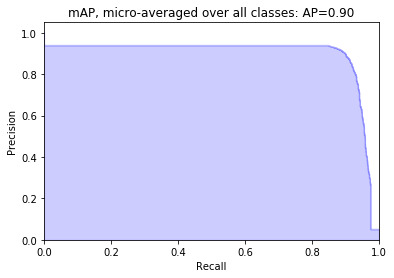

In [24]:
# 정답, 예측데이터를 가공하기 쉽도록 numpy 데이터로 변환합니다
test_y_one_hot = np.array(test_y)
pred_label_one_hot = np.array(pred_label_one_hot)


# 각각 딕셔너리 객체를 생성합니다
precision = dict()
recall = dict()
average_precision = dict()


# precision, recall, average_precision를 구합니다
for i in range(num_of_class):
    precision[i], recall[i], _ = precision_recall_curve(test_y_one_hot[:, i],
                                                        pred_label_one_hot[:, i])
    average_precision[i] = average_precision_score(test_y_one_hot[:, i], pred_label_one_hot[:, i])


# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(test_y_one_hot.ravel(),
    pred_label_one_hot.ravel())
average_precision["micro"] = average_precision_score(test_y_one_hot, pred_label_one_hot, average="micro")

# 각각의 클래스에 대해 average_precision을 구하고 그래프를 그립니다
for i in range(0, num_of_class):
    print('AP of each class [%d]: %.2f' % (i, float(average_precision[i])))

    '''# plot graph
    plt.figure()
    plt.step(recall[i], precision[i], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall[i], precision[i], step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Average precision score of each class: AP={0:0.2f}' .format(average_precision[i]))
    plt.show()'''
    



# 전체 클래스에 대해 average_precision을 구하고 그래프를 그립니다
print('mAP, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'mAP, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

plt.show()


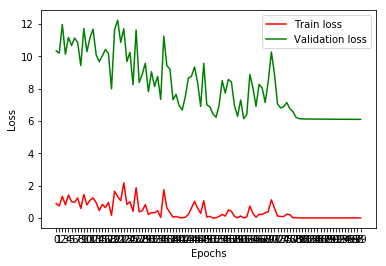

In [19]:
#------------------------------------------------
# Epoch-Loss 그래프를 그려주는 코드 
plt.figure()
plt.xticks(np.arange(0, len(train_loss), 1.0))
plt.ylabel("Loss")
plt.xlabel("Epochs")
train_line = plt.plot(range(0, len(train_loss)), train_loss, 'r', label="Train loss")
val_line = plt.plot(range(0, len(val_loss)), val_loss, 'g', label="Validation loss")
plt.legend()
plt.show()


INFO:tensorflow:Restoring parameters from ./part3_3.ckpt
48
Label:  100_SIGN [6]
Prediction:  100_SIGN [6]


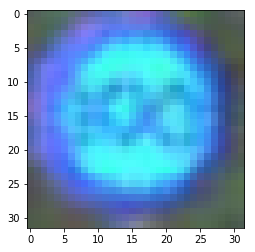

In [20]:
#----------------------------------------------
# 임의의 표지판 하나를 출력한 다음 맞혀보는 코드 
with tf.Session() as sess_test:
    saver.restore(sess_test, checkpoint_name)

    r = random.randint(0, len(test_x)-1)
    print(r)
    traffic_name = []
    traffic_name_pred = []
    index = sess_test.run(tf.argmax(y, 1), feed_dict={x:test_x[r:r+1]})[0]

    for i in range(0, num_of_class):
        if(test_y[r][i] == 1):
            traffic_name = recognizeOneHot(i)

    traffic_name_pred = recognizeOneHot(index)

    print ("Label: ", traffic_name)
    print ("Prediction: ", traffic_name_pred )

    test_x = np.array(test_x)
    plt.imshow(test_x[r].reshape(32, 32, 3), cmap='gray', interpolation='nearest')
    plt.show()


INFO:tensorflow:Restoring parameters from ./part3_3.ckpt
Actual: 50_SIGN [1], predicted: 70_SIGN [3]


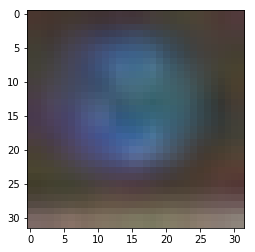

Actual: 80_SIGN [4], predicted: NO_STOPPING_NO_STANDING [17]


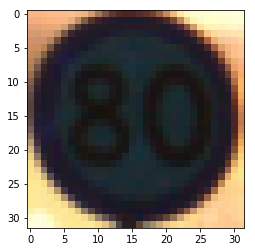

Actual: 50_SIGN [1], predicted: 80_SIGN [4]


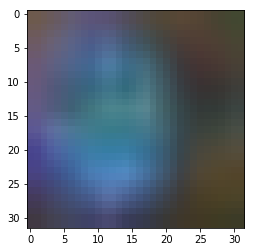

Actual: 80_SIGN [4], predicted: 50_SIGN [1]


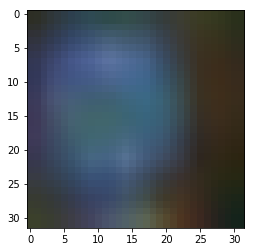

Actual: PEDESTRIAN_CROSSING [11], predicted: PASS_RIGH_SIDE [14]


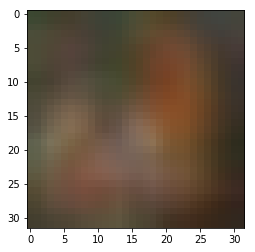

Actual: OTHER [12], predicted: 70_SIGN [3]


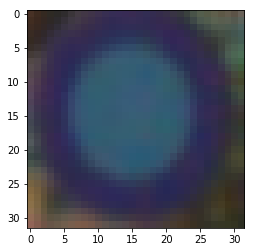

Actual: 30_SIGN [0], predicted: 80_SIGN [4]


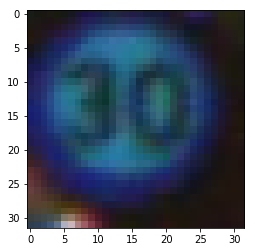

Actual: 90_SIGN [5], predicted: 100_SIGN [6]


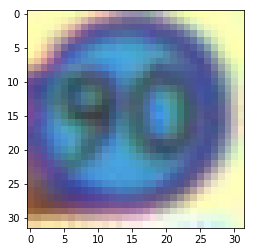

Actual: 70_SIGN [3], predicted: GIVE_WAY [9]


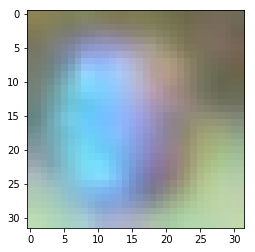

Actual: 90_SIGN [5], predicted: 80_SIGN [4]


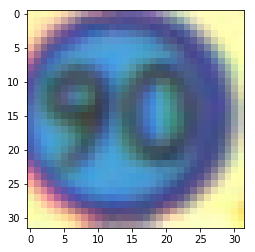

Actual: 60_SIGN [2], predicted: 80_SIGN [4]


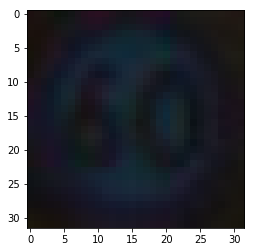

Actual: 50_SIGN [1], predicted: 70_SIGN [3]


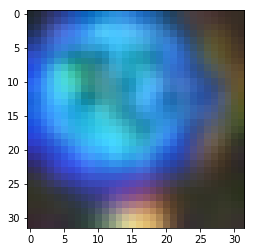

Actual: 90_SIGN [5], predicted: 120_SIGN [8]


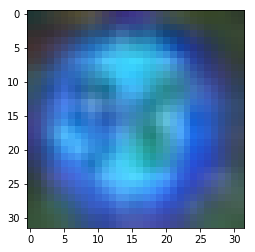

Actual: PASS_EITHER_SIDE [18], predicted: PASS_RIGH_SIDE [14]


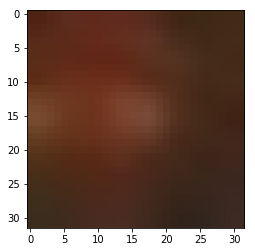

Actual: 80_SIGN [4], predicted: 100_SIGN [6]


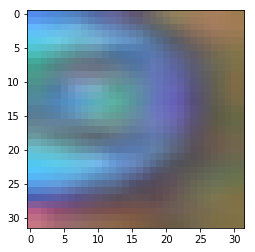

Actual: OTHER [12], predicted: 70_SIGN [3]


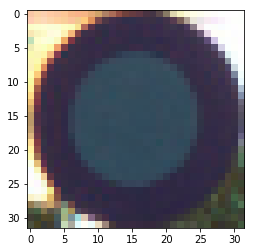

Actual: OTHER [12], predicted: 80_SIGN [4]


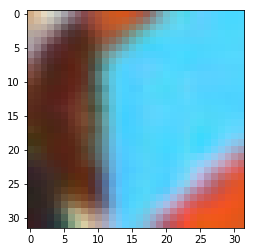

Actual: 80_SIGN [4], predicted: 100_SIGN [6]


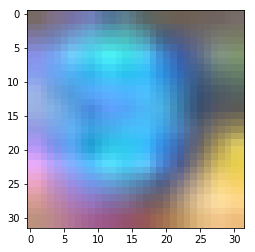

Actual: 110_SIGN [7], predicted: 80_SIGN [4]


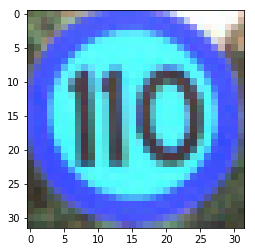

Actual: OTHER [12], predicted: GIVE_WAY [9]


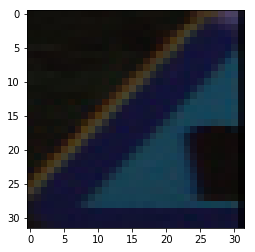

Actual: OTHER [12], predicted: PEDESTRIAN_CROSSING [11]


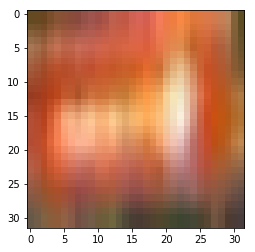

Actual: 60_SIGN [2], predicted: 80_SIGN [4]


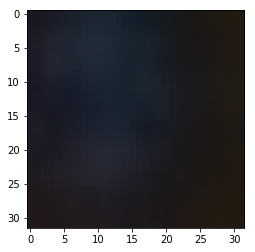

Actual: 50_SIGN [1], predicted: OTHER [12]


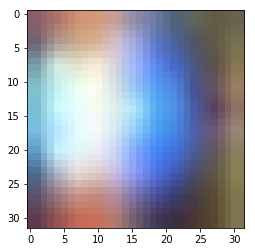

Actual: 80_SIGN [4], predicted: GIVE_WAY [9]


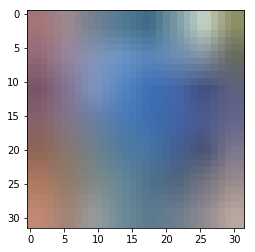

Actual: OTHER [12], predicted: NO_PARKING [10]


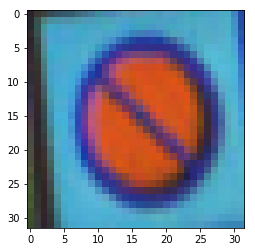

Actual: 60_SIGN [2], predicted: 80_SIGN [4]


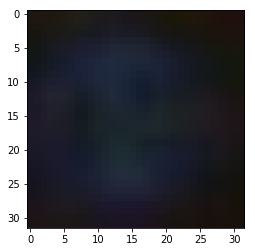

Actual: PASS_RIGH_SIDE [14], predicted: PEDESTRIAN_CROSSING [11]


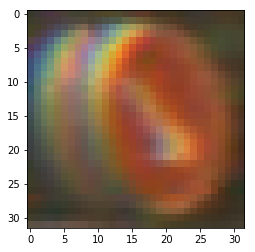

Actual: 110_SIGN [7], predicted: 80_SIGN [4]


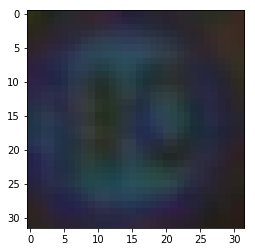

Actual: 100_SIGN [6], predicted: 50_SIGN [1]


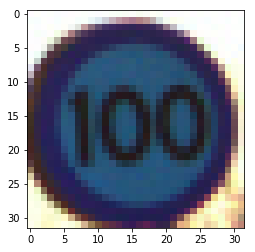

Actual: 50_SIGN [1], predicted: 120_SIGN [8]


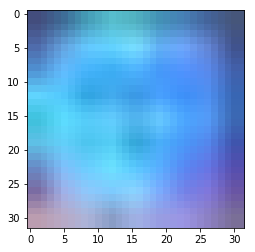

Actual: 30_SIGN [0], predicted: PRIORITY_ROAD [13]


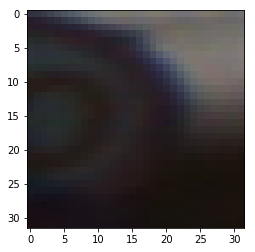

Actual: PASS_EITHER_SIDE [18], predicted: PASS_RIGH_SIDE [14]


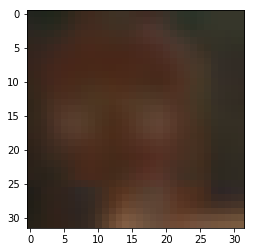

Actual: 30_SIGN [0], predicted: 50_SIGN [1]


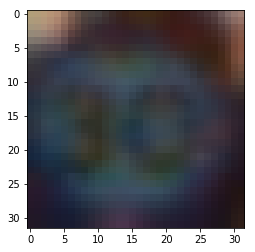

Actual: 110_SIGN [7], predicted: GIVE_WAY [9]


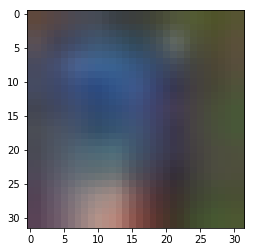

Actual: PASS_RIGH_SIDE [14], predicted: NO_STOPPING_NO_STANDING [17]


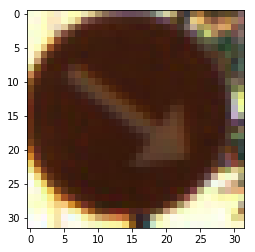

Actual: PRIORITY_ROAD [13], predicted: GIVE_WAY [9]


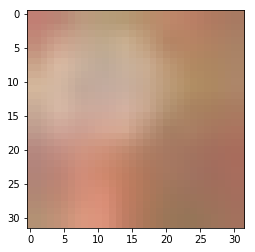

Actual: PRIORITY_ROAD [13], predicted: OTHER [12]


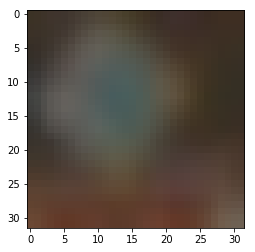

Actual: NO_STOPPING_NO_STANDING [17], predicted: NO_PARKING [10]


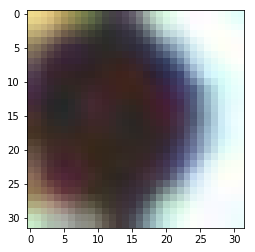

Actual: 70_SIGN [3], predicted: 120_SIGN [8]


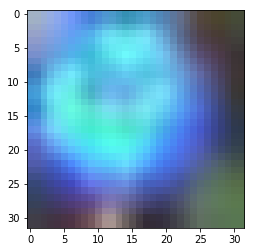

Actual: 100_SIGN [6], predicted: PRIORITY_ROAD [13]


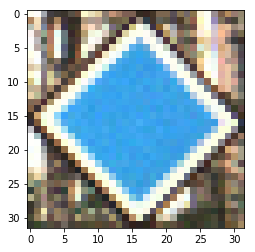

Actual: OTHER [12], predicted: 50_SIGN [1]


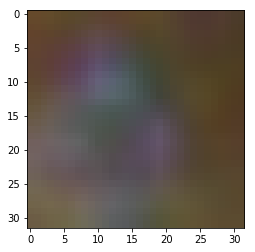

Actual: 80_SIGN [4], predicted: 100_SIGN [6]


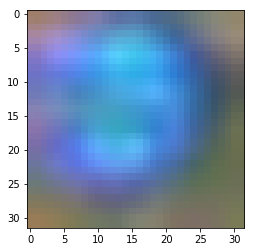

Actual: 50_SIGN [1], predicted: OTHER [12]


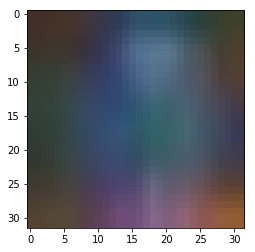

Actual: OTHER [12], predicted: GIVE_WAY [9]


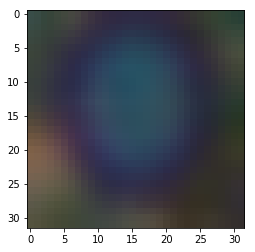

Actual: 50_SIGN [1], predicted: 100_SIGN [6]


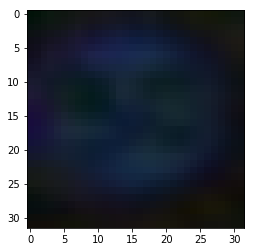

Actual: 70_SIGN [3], predicted: 50_SIGN [1]


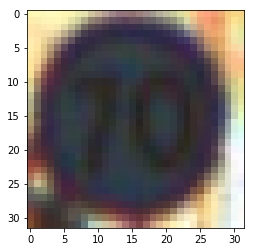

Actual: 80_SIGN [4], predicted: 50_SIGN [1]


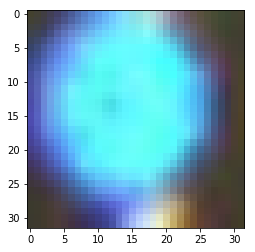

Actual: 50_SIGN [1], predicted: 100_SIGN [6]


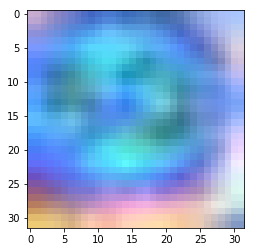

Actual: URDBL [16], predicted: 120_SIGN [8]


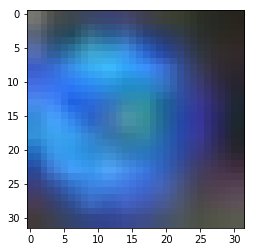

Actual: GIVE_WAY [9], predicted: OTHER [12]


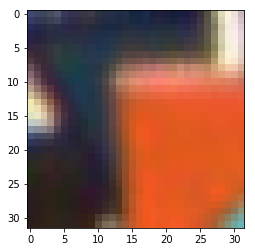

Actual: OTHER [12], predicted: 30_SIGN [0]


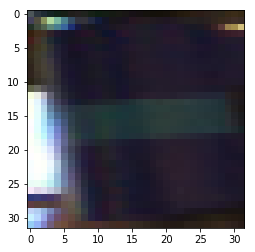

Actual: PRIORITY_ROAD [13], predicted: PEDESTRIAN_CROSSING [11]


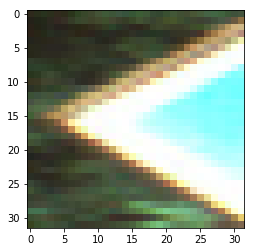

Actual: 110_SIGN [7], predicted: 80_SIGN [4]


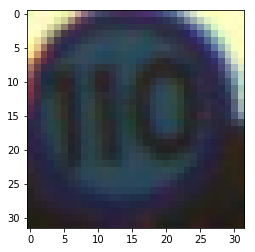

Actual: 100_SIGN [6], predicted: 120_SIGN [8]


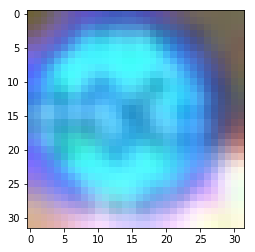

Actual: 50_SIGN [1], predicted: PRIORITY_ROAD [13]


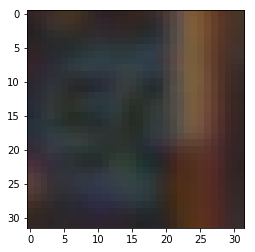

Actual: 70_SIGN [3], predicted: 50_SIGN [1]


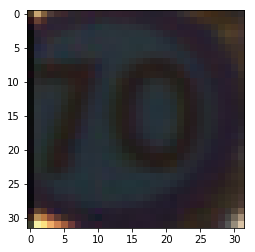

Actual: 90_SIGN [5], predicted: 120_SIGN [8]


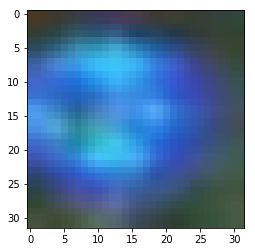

Actual: NO_STOPPING_NO_STANDING [17], predicted: NO_PARKING [10]


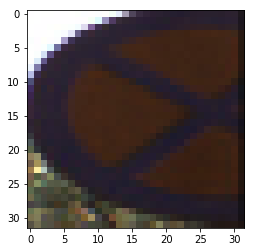

Actual: 30_SIGN [0], predicted: 80_SIGN [4]


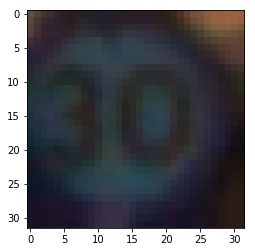

Actual: OTHER [12], predicted: PEDESTRIAN_CROSSING [11]


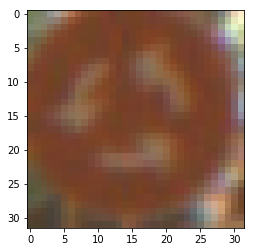

Actual: 60_SIGN [2], predicted: 80_SIGN [4]


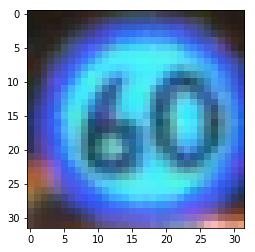

Actual: 90_SIGN [5], predicted: 50_SIGN [1]


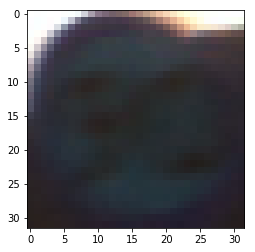

Actual: 50_SIGN [1], predicted: 80_SIGN [4]


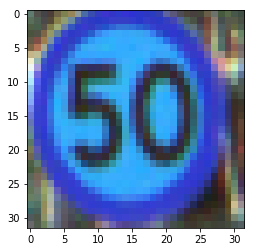

Actual: PRIORITY_ROAD [13], predicted: GIVE_WAY [9]


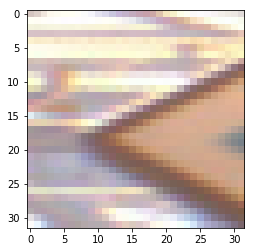

Actual: OTHER [12], predicted: 70_SIGN [3]


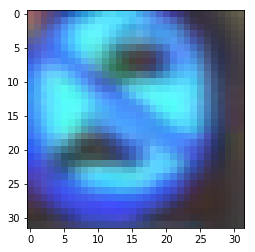

Actual: PRIORITY_ROAD [13], predicted: GIVE_WAY [9]


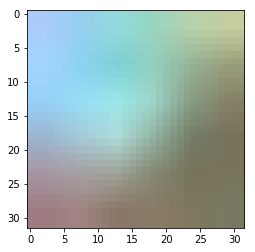

Actual: GIVE_WAY [9], predicted: PRIORITY_ROAD [13]


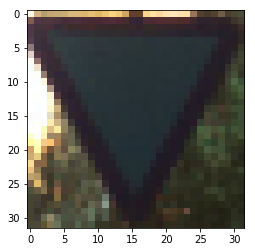

Actual: OTHER [12], predicted: NO_PARKING [10]


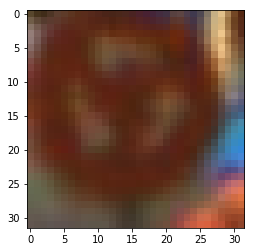

Actual: OTHER [12], predicted: NO_PARKING [10]


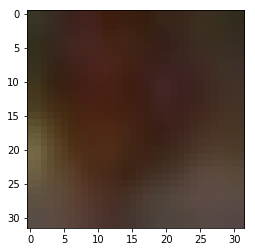

Actual: OTHER [12], predicted: PRIORITY_ROAD [13]


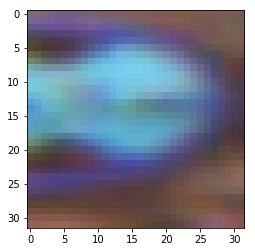

Actual: 110_SIGN [7], predicted: 70_SIGN [3]


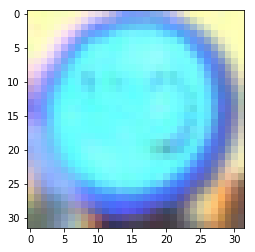

Actual: 80_SIGN [4], predicted: 50_SIGN [1]


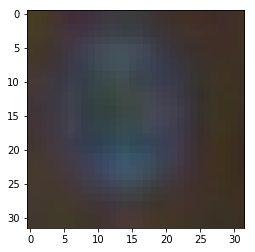

Actual: STOP [19], predicted: NO_STOPPING_NO_STANDING [17]


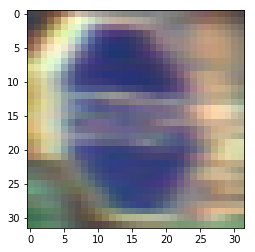

Actual: PASS_RIGH_SIDE [14], predicted: OTHER [12]


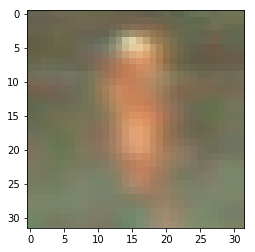

Actual: GIVE_WAY [9], predicted: OTHER [12]


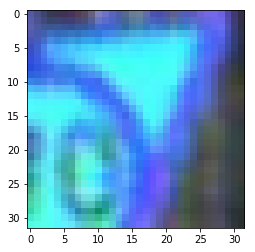

Actual: 90_SIGN [5], predicted: 50_SIGN [1]


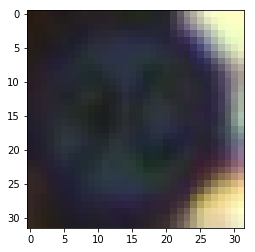

Actual: NO_STOPPING_NO_STANDING [17], predicted: NO_PARKING [10]


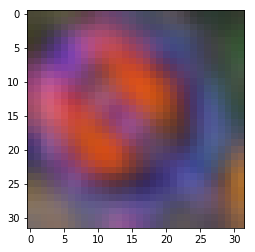

Actual: 70_SIGN [3], predicted: 120_SIGN [8]


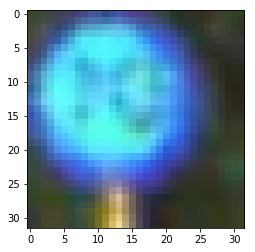

Actual: 120_SIGN [8], predicted: 100_SIGN [6]


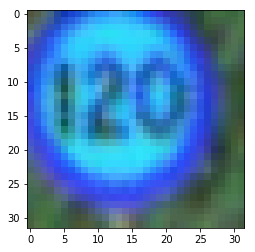

Actual: 30_SIGN [0], predicted: 70_SIGN [3]


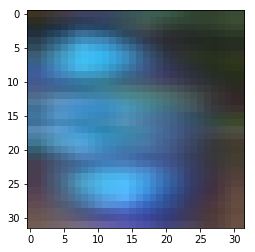

Actual: 50_SIGN [1], predicted: 80_SIGN [4]


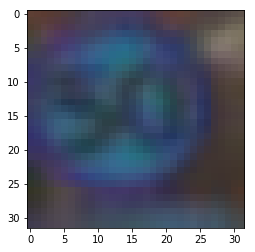

Actual: OTHER [12], predicted: PEDESTRIAN_CROSSING [11]


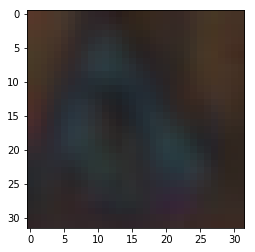

Actual: URDBL [16], predicted: 120_SIGN [8]


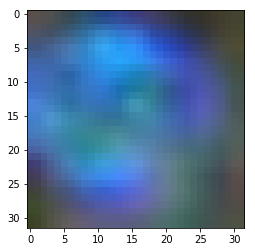

Actual: OTHER [12], predicted: URDBL [16]


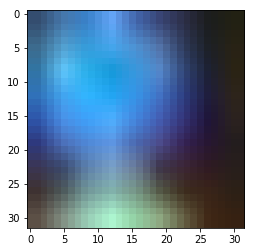

Actual: PRIORITY_ROAD [13], predicted: NO_STOPPING_NO_STANDING [17]


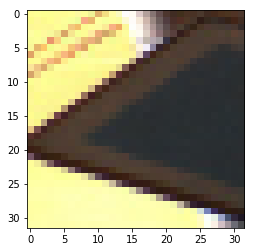

Actual: 70_SIGN [3], predicted: 50_SIGN [1]


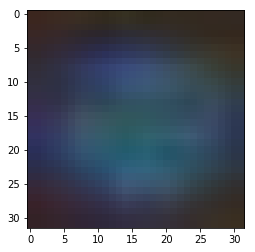

Actual: 70_SIGN [3], predicted: 120_SIGN [8]


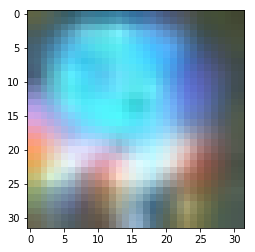

Actual: PEDESTRIAN_CROSSING [11], predicted: PASS_RIGH_SIDE [14]


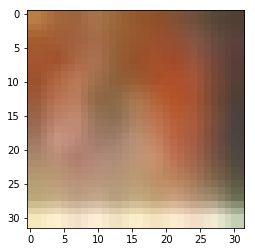

Actual: 80_SIGN [4], predicted: 90_SIGN [5]


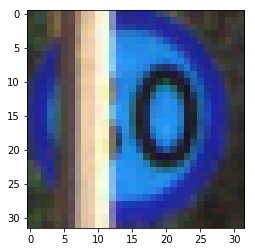

Actual: NO_STOPPING_NO_STANDING [17], predicted: NO_PARKING [10]


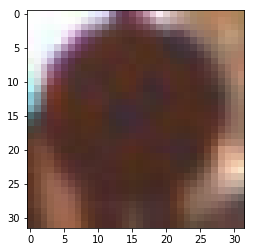

Actual: 70_SIGN [3], predicted: 50_SIGN [1]


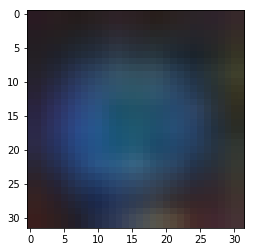

Actual: OTHER [12], predicted: 70_SIGN [3]


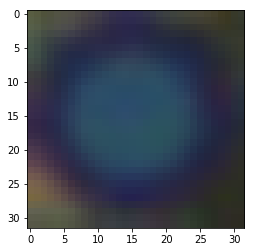

Actual: OTHER [12], predicted: 80_SIGN [4]


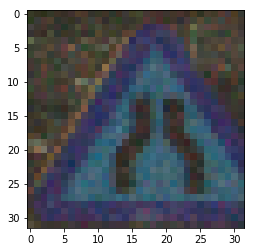

Actual: OTHER [12], predicted: 70_SIGN [3]


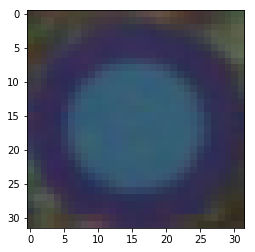

Actual: 80_SIGN [4], predicted: 50_SIGN [1]


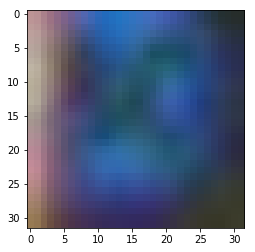

Actual: OTHER [12], predicted: NO_PARKING [10]


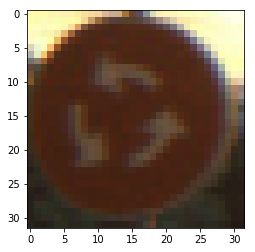

Actual: 60_SIGN [2], predicted: 80_SIGN [4]


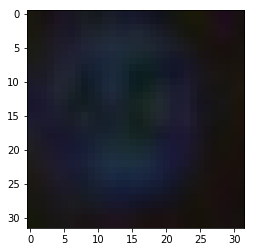

Actual: NO_STOPPING_NO_STANDING [17], predicted: OTHER [12]


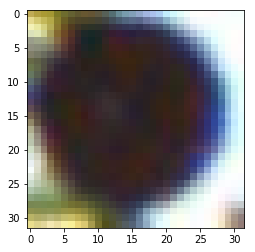

Actual: 80_SIGN [4], predicted: 50_SIGN [1]


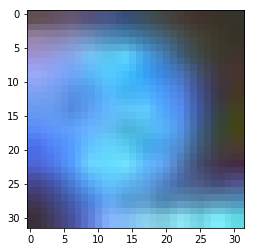

Actual: 80_SIGN [4], predicted: 100_SIGN [6]


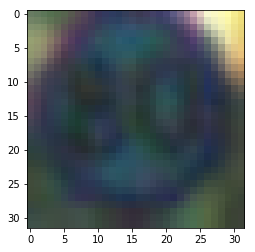

Actual: 90_SIGN [5], predicted: OTHER [12]


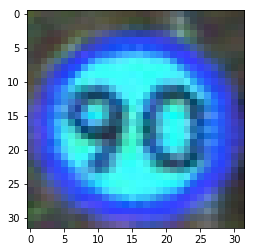

Actual: PASS_RIGH_SIDE [14], predicted: NO_PARKING [10]


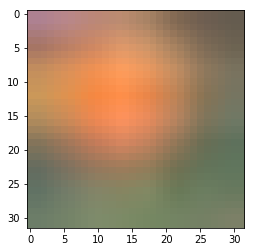

Actual: PEDESTRIAN_CROSSING [11], predicted: OTHER [12]


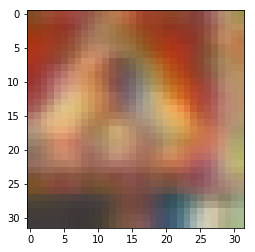

Actual: OTHER [12], predicted: NO_STOPPING_NO_STANDING [17]


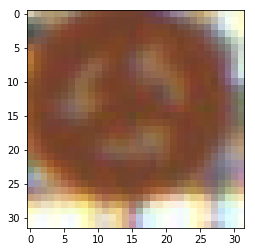

Actual: GIVE_WAY [9], predicted: 80_SIGN [4]


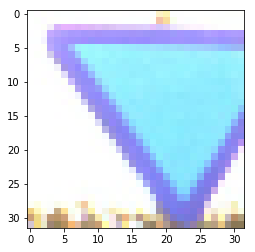

Actual: PEDESTRIAN_CROSSING [11], predicted: OTHER [12]


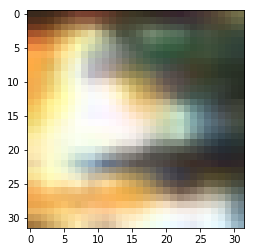

Actual: PRIORITY_ROAD [13], predicted: GIVE_WAY [9]


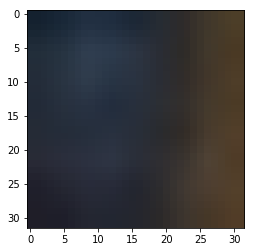

Actual: NO_STOPPING_NO_STANDING [17], predicted: NO_PARKING [10]


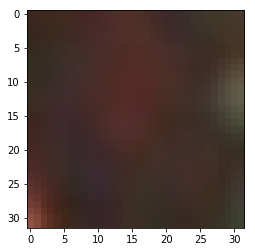

Actual: GIVE_WAY [9], predicted: OTHER [12]


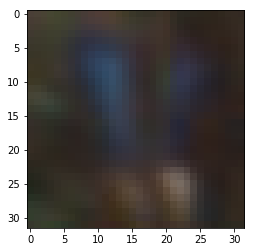

Actual: OTHER [12], predicted: 50_SIGN [1]


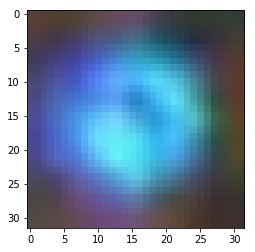

Actual: 100_SIGN [6], predicted: 70_SIGN [3]


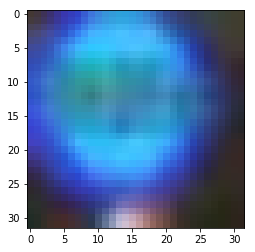

Actual: 60_SIGN [2], predicted: 110_SIGN [7]


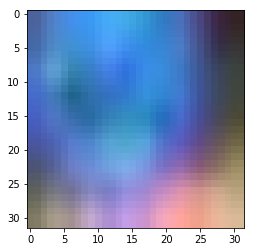

Actual: 80_SIGN [4], predicted: OTHER [12]


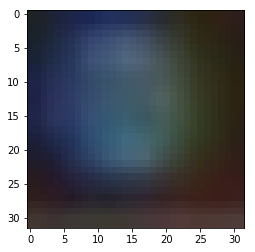

Actual: PASS_RIGH_SIDE [14], predicted: PEDESTRIAN_CROSSING [11]


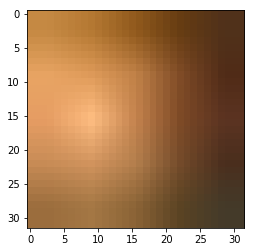

Actual: 100_SIGN [6], predicted: 80_SIGN [4]


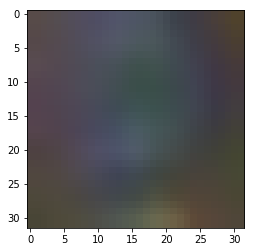

Actual: PASS_RIGH_SIDE [14], predicted: NO_PARKING [10]


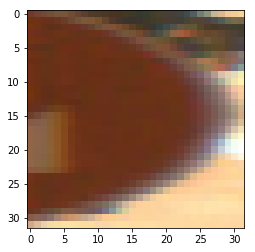

Actual: PEDESTRIAN_CROSSING [11], predicted: PRIORITY_ROAD [13]


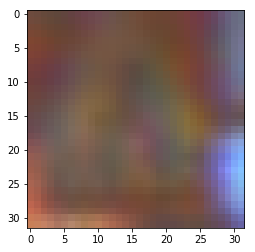

Actual: 70_SIGN [3], predicted: PRIORITY_ROAD [13]


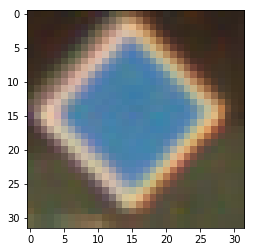

Actual: 90_SIGN [5], predicted: OTHER [12]


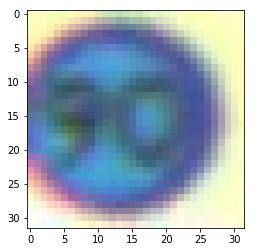

Actual: 110_SIGN [7], predicted: 50_SIGN [1]


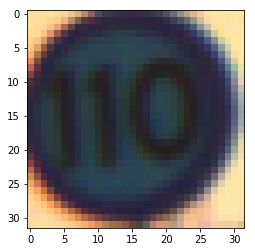

Actual: OTHER [12], predicted: 70_SIGN [3]


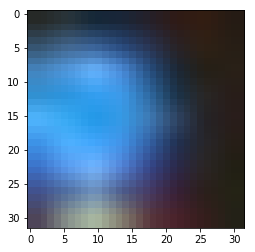

Actual: PASS_RIGH_SIDE [14], predicted: PEDESTRIAN_CROSSING [11]


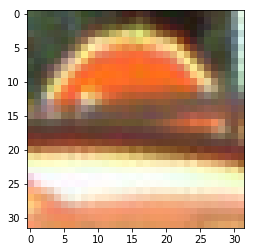

Actual: 70_SIGN [3], predicted: 50_SIGN [1]


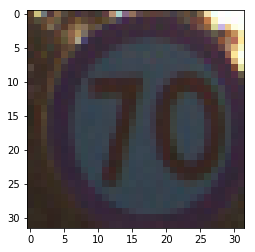

Actual: STOP [19], predicted: OTHER [12]


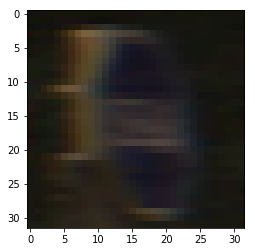

Actual: OTHER [12], predicted: PEDESTRIAN_CROSSING [11]


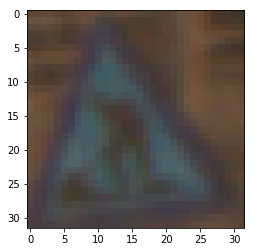

Actual: PRIORITY_ROAD [13], predicted: GIVE_WAY [9]


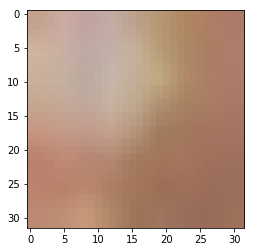

Actual: 80_SIGN [4], predicted: OTHER [12]


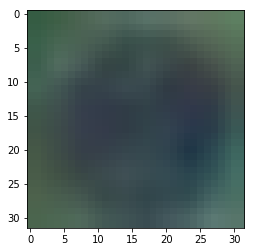

Actual: PRIORITY_ROAD [13], predicted: GIVE_WAY [9]


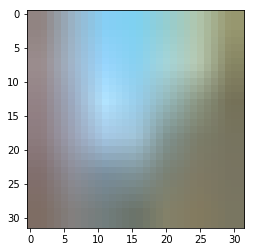

Actual: PRIORITY_ROAD [13], predicted: 50_SIGN [1]


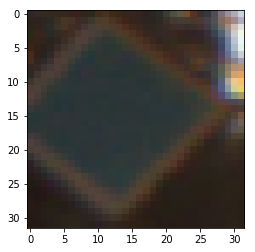

Actual: 90_SIGN [5], predicted: NO_STOPPING_NO_STANDING [17]


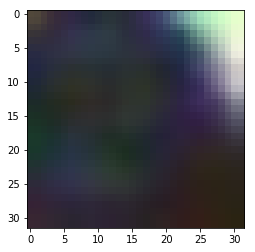

Actual: PASS_RIGH_SIDE [14], predicted: OTHER [12]


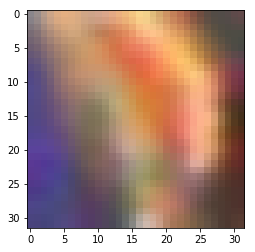

Actual: 110_SIGN [7], predicted: 50_SIGN [1]


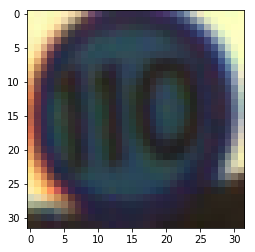

Actual: PRIORITY_ROAD [13], predicted: NO_STOPPING_NO_STANDING [17]


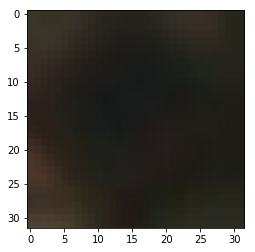

Actual: NO_STOPPING_NO_STANDING [17], predicted: NO_PARKING [10]


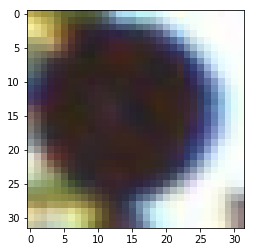

Actual: 80_SIGN [4], predicted: 50_SIGN [1]


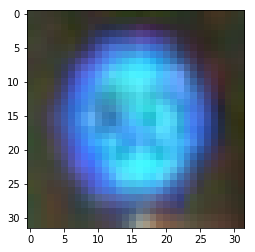

Actual: 50_SIGN [1], predicted: 80_SIGN [4]


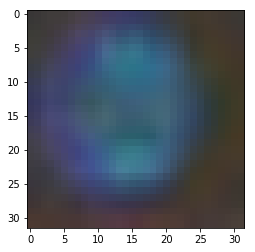

Actual: 100_SIGN [6], predicted: 80_SIGN [4]


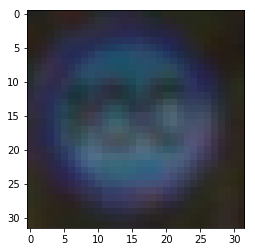

Actual: 30_SIGN [0], predicted: 50_SIGN [1]


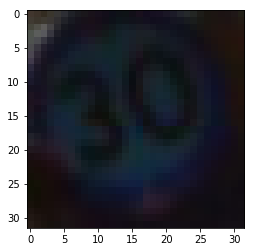

Actual: PRIORITY_ROAD [13], predicted: PEDESTRIAN_CROSSING [11]


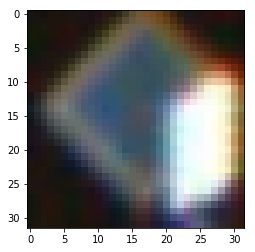

Actual: GIVE_WAY [9], predicted: PRIORITY_ROAD [13]


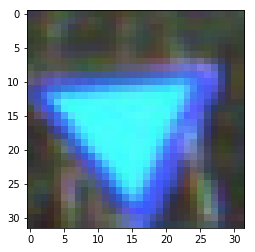

Actual: GIVE_WAY [9], predicted: PRIORITY_ROAD [13]


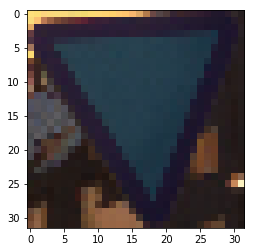

Actual: 30_SIGN [0], predicted: 120_SIGN [8]


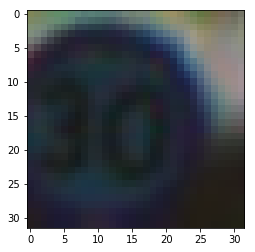

Actual: 100_SIGN [6], predicted: OTHER [12]


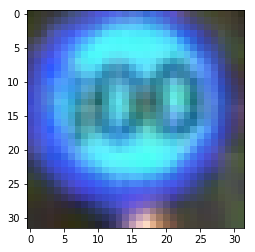

Actual: 50_SIGN [1], predicted: 80_SIGN [4]


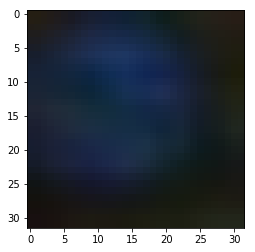

Actual: 50_SIGN [1], predicted: GIVE_WAY [9]


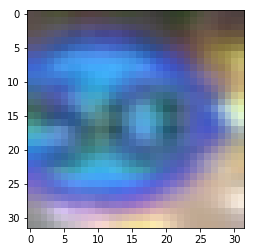

Actual: 100_SIGN [6], predicted: 120_SIGN [8]


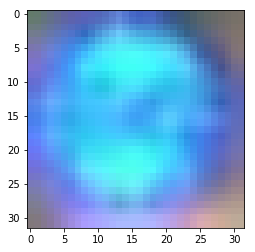

Actual: OTHER [12], predicted: GIVE_WAY [9]


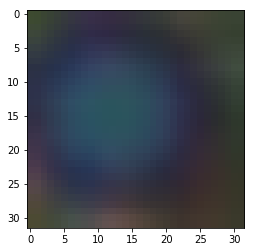

Actual: 100_SIGN [6], predicted: 120_SIGN [8]


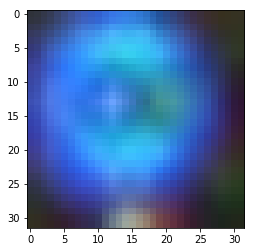

Actual: 70_SIGN [3], predicted: 120_SIGN [8]


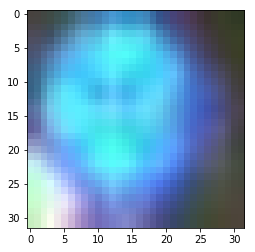

Actual: OTHER [12], predicted: 70_SIGN [3]


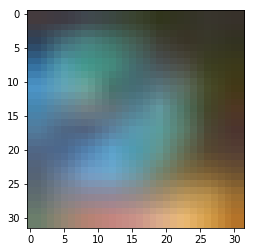

Actual: 60_SIGN [2], predicted: 110_SIGN [7]


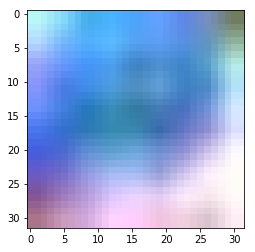

Actual: PASS_RIGH_SIDE [14], predicted: OTHER [12]


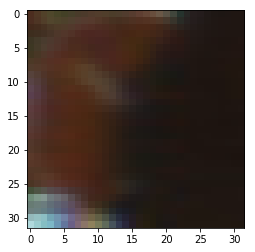

Actual: OTHER [12], predicted: GIVE_WAY [9]


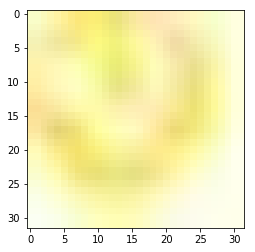

Actual: 70_SIGN [3], predicted: 50_SIGN [1]


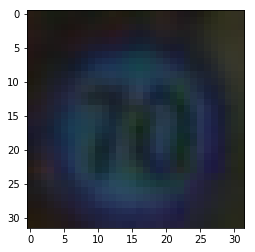

Actual: PRIORITY_ROAD [13], predicted: 80_SIGN [4]


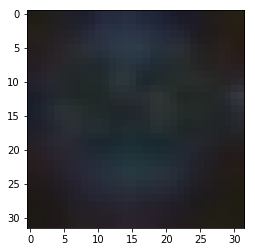

Actual: PASS_EITHER_SIDE [18], predicted: PASS_RIGH_SIDE [14]


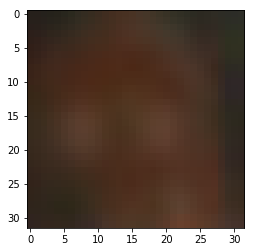

Actual: NO_STOPPING_NO_STANDING [17], predicted: 50_SIGN [1]


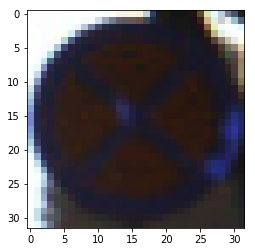

Actual: 70_SIGN [3], predicted: 120_SIGN [8]


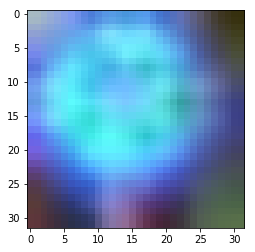

Actual: OTHER [12], predicted: 50_SIGN [1]


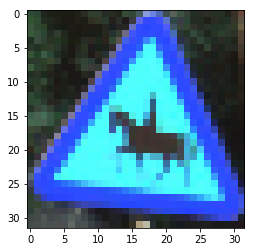

Actual: 120_SIGN [8], predicted: 50_SIGN [1]


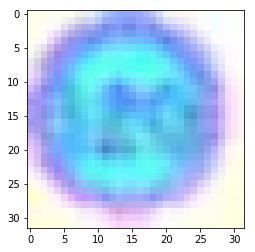

Actual: OTHER [12], predicted: 80_SIGN [4]


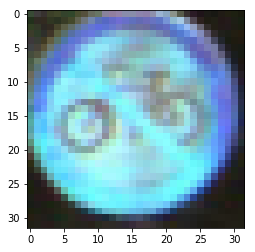

Actual: PASS_RIGH_SIDE [14], predicted: PEDESTRIAN_CROSSING [11]


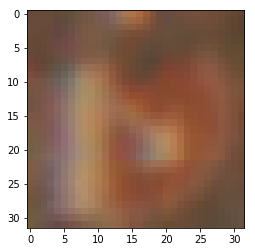

Actual: 50_SIGN [1], predicted: 70_SIGN [3]


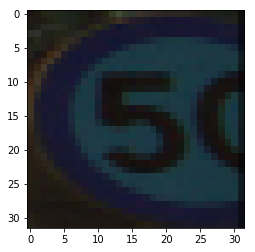

Actual: 120_SIGN [8], predicted: 100_SIGN [6]


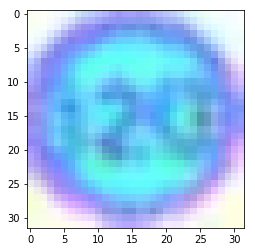

Actual: PASS_RIGH_SIDE [14], predicted: OTHER [12]


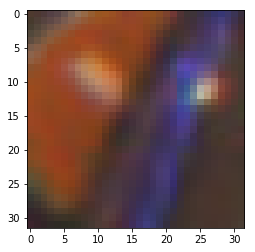

Actual: 80_SIGN [4], predicted: OTHER [12]


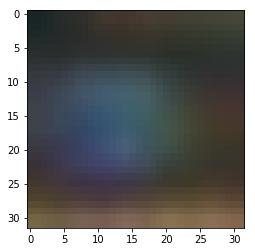

Actual: PEDESTRIAN_CROSSING [11], predicted: OTHER [12]


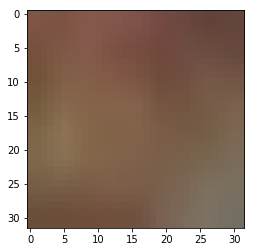

Actual: PEDESTRIAN_CROSSING [11], predicted: PRIORITY_ROAD [13]


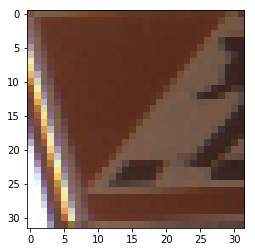

Actual: OTHER [12], predicted: NO_PARKING [10]


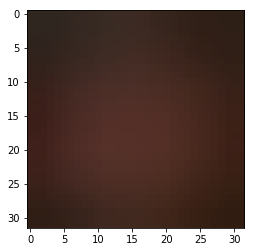

Actual: PEDESTRIAN_CROSSING [11], predicted: OTHER [12]


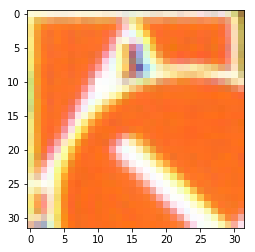

Actual: OTHER [12], predicted: 70_SIGN [3]


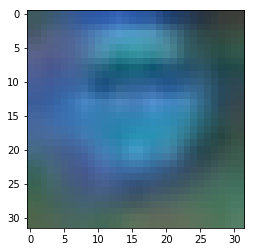

Actual: STOP [19], predicted: OTHER [12]


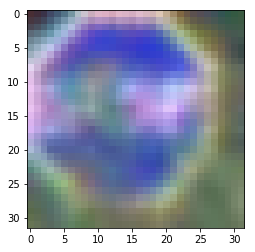

Actual: 50_SIGN [1], predicted: OTHER [12]


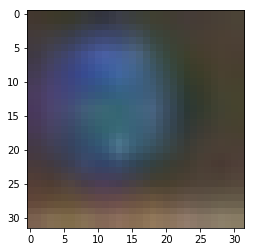

Actual: 90_SIGN [5], predicted: NO_PARKING [10]


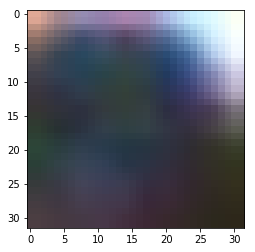

Actual: 60_SIGN [2], predicted: 50_SIGN [1]


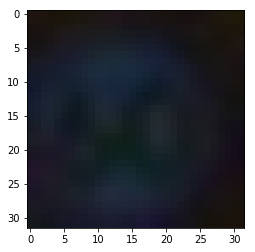

Actual: 70_SIGN [3], predicted: OTHER [12]


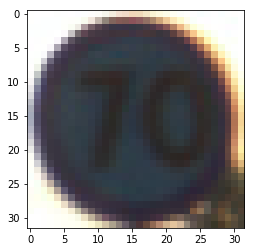

Actual: OTHER [12], predicted: PASS_RIGH_SIDE [14]


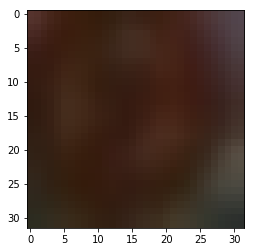

Actual: 50_SIGN [1], predicted: 80_SIGN [4]


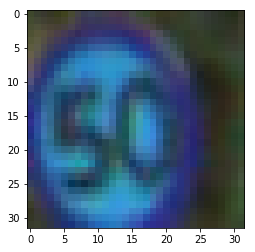

Actual: GIVE_WAY [9], predicted: PRIORITY_ROAD [13]


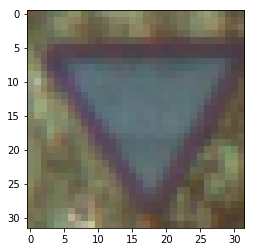

Actual: URDBL [16], predicted: 110_SIGN [7]


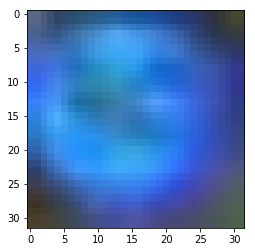

Actual: OTHER [12], predicted: 50_SIGN [1]


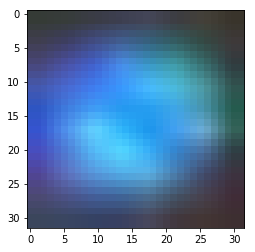

Actual: 30_SIGN [0], predicted: GIVE_WAY [9]


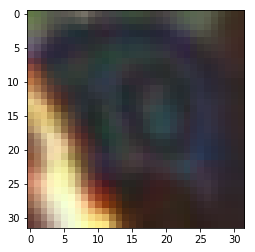

Actual: OTHER [12], predicted: GIVE_WAY [9]


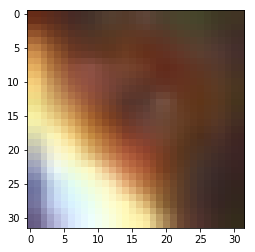

Actual: 30_SIGN [0], predicted: 90_SIGN [5]


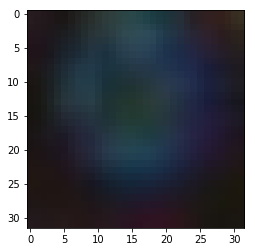

Actual: PRIORITY_ROAD [13], predicted: 70_SIGN [3]


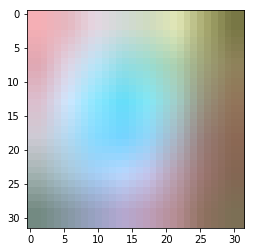

Actual: PEDESTRIAN_CROSSING [11], predicted: PASS_RIGH_SIDE [14]


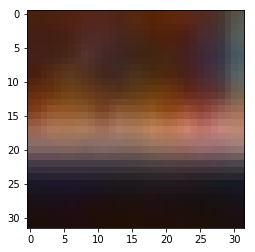

Actual: 110_SIGN [7], predicted: 50_SIGN [1]


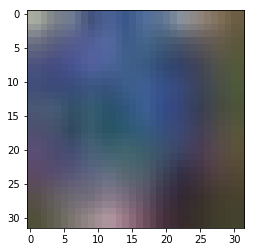

Actual: 90_SIGN [5], predicted: 70_SIGN [3]


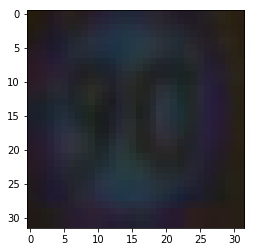

Actual: PRIORITY_ROAD [13], predicted: NO_STOPPING_NO_STANDING [17]


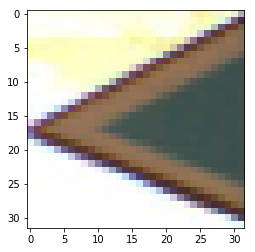

Actual: PEDESTRIAN_CROSSING [11], predicted: PRIORITY_ROAD [13]


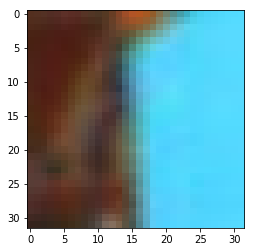

Actual: 120_SIGN [8], predicted: 70_SIGN [3]


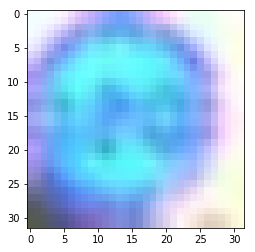

Actual: 100_SIGN [6], predicted: 70_SIGN [3]


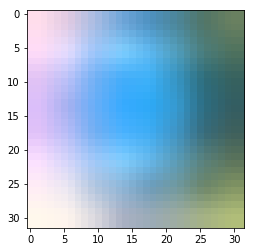

Actual: 70_SIGN [3], predicted: OTHER [12]


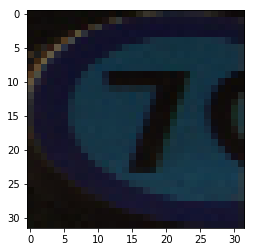

Actual: 80_SIGN [4], predicted: OTHER [12]


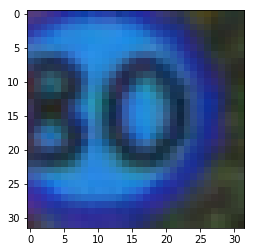

Actual: 90_SIGN [5], predicted: 50_SIGN [1]


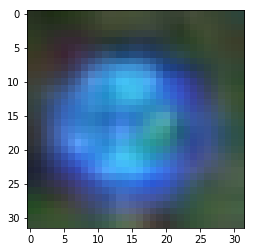

Actual: OTHER [12], predicted: GIVE_WAY [9]


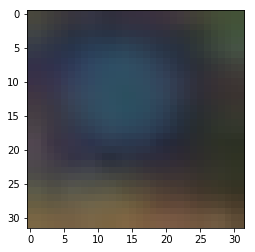

Actual: NO_STOPPING_NO_STANDING [17], predicted: NO_PARKING [10]


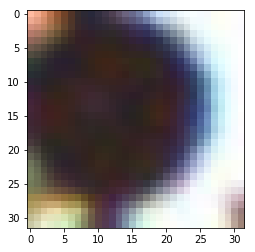

Actual: 50_SIGN [1], predicted: 70_SIGN [3]


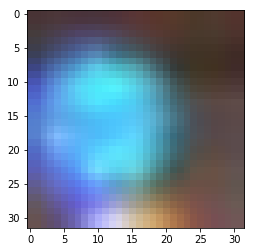

Actual: 90_SIGN [5], predicted: 30_SIGN [0]


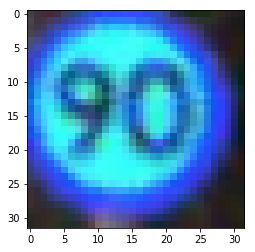

Actual: 70_SIGN [3], predicted: 80_SIGN [4]


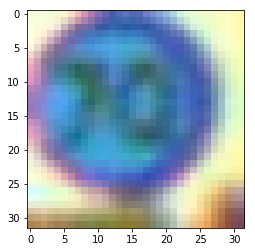

Actual: OTHER [12], predicted: NO_STOPPING_NO_STANDING [17]


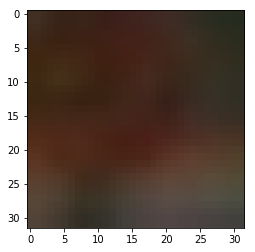

Actual: PASS_EITHER_SIDE [18], predicted: OTHER [12]


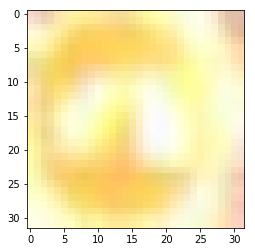

Actual: 100_SIGN [6], predicted: 120_SIGN [8]


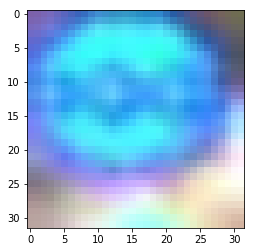

Actual: PRIORITY_ROAD [13], predicted: PEDESTRIAN_CROSSING [11]


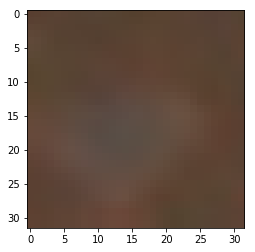

Actual: 50_SIGN [1], predicted: OTHER [12]


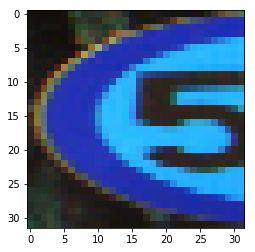

Actual: 110_SIGN [7], predicted: OTHER [12]


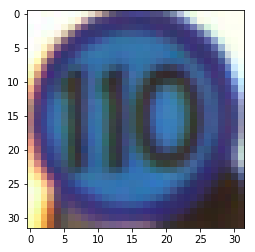

In [21]:
#----------------------------------------------
# 훈련모델에 Test 데이터를 넣어본 다음 예측이 틀린 경우에만 출력하는 코드
#----------------------------------------------
zipped_x_y = list(zip(test_x, test_y))
conf_true = []
conf_pred = []

with tf.Session() as sess_test:
    saver.restore(sess_test, checkpoint_name)

    for tt in range(0, len(zipped_x_y)):
        q = zipped_x_y[tt]
        sfmax = list(sess_test.run(tf.nn.softmax(y.eval(feed_dict={x: [q[0]]})))[0])
        sf_ind = sfmax.index(max(sfmax))
        
        predicted_label = recognizeOneHot(sf_ind)
        actual_label = recognizeOneHot(q[1].index(max(q[1])))
        
        conf_true.append(actual_label)
        conf_pred.append(predicted_label)
        
        if predicted_label != actual_label:
            print("Actual: {}, predicted: {}".format(actual_label, predicted_label))
            plt.imshow(test_x[tt].reshape(32, 32, 3), cmap='gray', interpolation='nearest')
            plt.show()

